  # Energy Demand Forecasting #

Within our planet's expanding population, we are faced with an increasing demand for energy, depleting supplies of conventional fossil fuels, slow development of renewable energy technologies and carbon emissions that won't slow down. These issues can be solved by energy companies and the Ministries of Energy. This project's objective will be to develop a model that predicts Hourly Energy demand for 24 hours based on weather forecasts. 

By being able to predict energy demand from weather features, companies can plan energy generation that can: 
 1. Avoid grid oversupply which can: - Choke the grid and save wasted energy and hence reduce unnecesary carbon emmissions.
 2. Avoid undersupply which will lead to power cuts.
 2. Distribute energy source generation.


## The Data 
Two datasets will be examined throught this project.
 1. An Energy Dataset containing Energy generation and Energy demand for all of spain.
 2. A Weather dataset containg weather features for 5 major Spanish cities.
 
 # Section 1: EDA
 
 In this section, the datsets will be eaxmined to show how demand changes on different timescales scale. Weather features will also be analyzed to find correlations with each other as well as how demand will be affected. Energy generation is know to move with demand but it will also be examined in order to gain an understanding of how energy is disributed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from matplotlib.font_manager import FontProperties
sns.set()

In [3]:
energy=pd.read_csv("../data/raw/energy_dataset.csv", parse_dates=['time'], index_col='time')
weather=pd.read_csv("../data/raw/weather_features.csv", parse_dates=['dt_iso'], index_col=['dt_iso'])

In [221]:
energy.index=pd.to_datetime(energy.index, utc=True)+pd.DateOffset(hours=1)
weather.index=pd.to_datetime(weather.index, utc=True)+pd.DateOffset(hours=1)

#  1.1. Energy Demand 

In [5]:
energy.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+00:00               447.0   
2015-01-01 01:00:00+00:00               449.0   
2015-01-01 02:00:00+00:00               448.0   
2015-01-01 03:00:00+00:00               438.0   
2015-01-01 04:00:00+00:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+00:00                                 329.0   
2015-01-01 01:00:00+00:00                                 328.0   
2015-01-01 02:00:00+00:00                                 323.0   
2015-01-01 03:00:00+00:00                                 254.0   
2015-01-01 04:00:00+00:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+00:00                                 0.0   
2015-01-01 01:00:00+00:00                                 0.0   
2015-01-01 02:00:00+00:00                                 0.0   
2015-01-01 03:00:00+00:00                                 0.0   
2015-01-01 04:00:00+00:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+00:00                 4844.0                       4821.0   
2015-01-01 01:00:00+00:00                 5196.0                       4755.0   
2015-01-01 02:00:00+00:00                 4857.0                       4581.0   
2015-01-01 03:00:00+00:00                 4314.0                       4131.0   
2015-01-01 04:00:00+00:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+00:00                  162.0                          0.0   
2015-01-01 01:00:00+00:00                  158.0                          0.0   
2015-01-01 02:00:00+00:00                  157.0                          0.0   
2015-01-01 03:00:00+00:00                  160.0                          0.0   
2015-01-01 04:00:00+00:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+00:00                     0.0                    0.0   
2015-01-01 01:00:00+00:00                     0.0                    0.0   
2015-01-01 02:00:00+00:00                     0.0                    0.0   
2015-01-01 03:00:00+00:00                     0.0                    0.0   
2015-01-01 04:00:00+00:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+00:00                                         NaN  ...   
2015-01-01 01:00:00+00:00                                         NaN  ...   
2015-01-01 02:00:00+00:00                                         NaN  ...   
2015-01-01 03:00:00+00:00                                         NaN  ...   
2015-01-01 04:00:00+00:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+00:00             196.0                       0.0   
2015-01-01 01:00:00+00:00             195.0                       0.0   
2015-01-01 02:00:00+00:00             196.0                       0.0   
2015-01-01 03:00:00+00:00             191.0                       0.0   
2015-01-01 04:00:00+00:00             189.0                       0.0   

                           ge

In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+00:00 to 2018-12-31 23:00:00+00:00
Freq: H
Data columns (total 28 columns):
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non-null float64


For now, the demand( total load actual) would be the main analysis. Let's plot it...
- "Total load actual" is in MW

In [7]:
#Initiating Demand Series
demand=energy['total load actual']

In [8]:
demand.describe()

count    35028.000000
mean     28696.939905
std       4574.987950
min      18041.000000
25%      24807.750000
50%      28901.000000
75%      32192.000000
max      41015.000000
Name: total load actual, dtype: float64

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


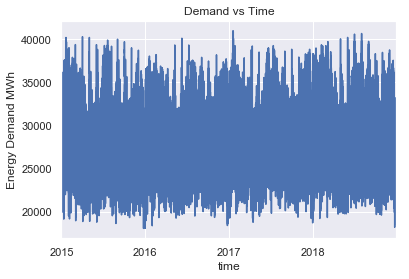

In [9]:
#plotting demand lineplot
demand.plot.line()
plt.ylabel("Energy Demand MWh")
plt.title("Demand vs Time");

Very hard to read this chart, we will need to resample the data to other timeframes to gain any insight.

Let's examine how demand changed on different timescales....

## 1. How did annual energy demand Change between 2015 and 2018? 

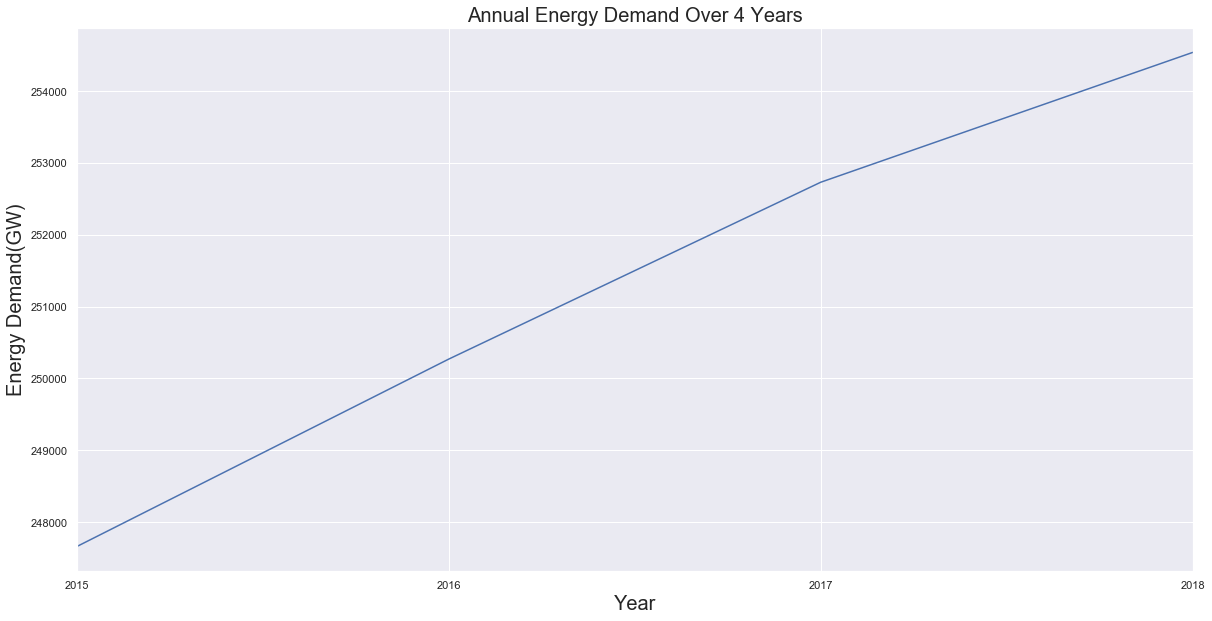

In [10]:
#resampling demand by year and adding all the data points to obtain total demand 
yearly_dem=demand.resample('Y').sum()

#Obtain Demand in GW instead of MW then plotting a line plot
((yearly_dem)*(10**6)/(10**9)).plot.line(figsize=[20,10])

plt.xlabel("Year",size=20)
plt.ylabel("Energy Demand(GW)",size=20)
plt.title("Annual Energy Demand Over 4 Years",size=20);

Energy demand has been steadily increasing between 2015 to 2018 but what is the rate of increase? It looks like the rate has slowed down between 2017 and 2018.

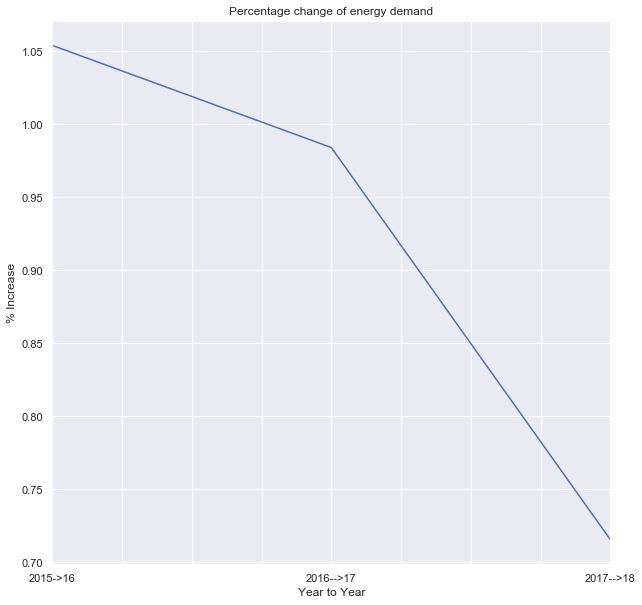

In [11]:
#creating a Pandas series with % changes of energy between each year
perc_increase={"2015->16":(yearly_dem[1]-yearly_dem[0])*100/yearly_dem[0],
               "2016-->17":(yearly_dem[2]-yearly_dem[1])*100/yearly_dem[1],
              "2017-->18":(yearly_dem[3]-yearly_dem[2])*100/yearly_dem[2]}
perc_increase=pd.Series(perc_increase)

#plotting a line plot to visualise year to year % change
perc_increase.plot.line(figsize=[10,10])
plt.ylabel("% Increase")
plt.xlabel("Year to Year")
plt.title("Percentage change of energy demand");

Indeed the rate of increase has been going down from 2015 to 2018. The rate was around 1.05% in 2015 but has decreased to around 0.7%. Not a significant decrease but signifies that the population is finding more efficient ways to utilize energy or weather has been relatively getting less extreme.

Let's dig deeper and look at monthly variations across 2015-->2018

## 2. How does energy demand vary by month?

In [12]:
#creating multiple series representing containing annual average hourly demand for each month 
demand_2015=demand[demand.index.year==2015].resample('M').mean()
demand_2016=demand[demand.index.year==2016].resample('M').mean()
demand_2017=demand[demand.index.year==2017].resample('M').mean()
demand_2018=demand[demand.index.year==2018].resample('M').mean()

#setting up dataframe and indicies of annual data for ease of platting
annual_hourly_demand=pd.DataFrame({2015:demand_2015.values,
                        2016:demand_2016.values, 
                        2017:demand_2017.values, 
                        2018:demand_2018.values})
annual_hourly_demand.index =np.arange(1,13)

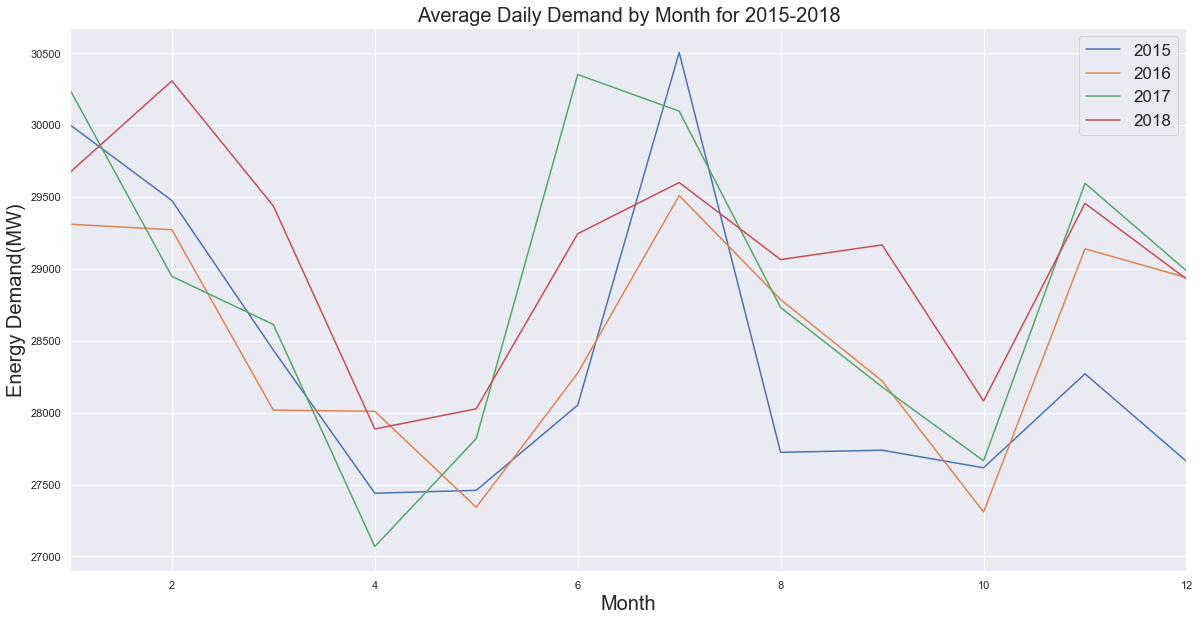

In [13]:
annual_hourly_demand.plot.line(figsize=[20,10])
plt.legend(prop={'size': 17})
plt.xlabel("Month",size=20)
plt.ylabel("Energy Demand(MW)",size=20)
plt.title('Average Daily Demand by Month for 2015-2018',size=20);


## Winter: 
Demand peak anytime in January. Due to heating requirements during the cold temperatures. 

## Spring:
Demand low. Decreases during Feb-Early May where we have annual demand lows. Weather is usually transitioning mild and the population is starting to enjoy beautiful weather.

## Summer
Demand peak during June/July. Weather becomes too hot to bear. Cooling demand and more travel occurs. 

## Fall
Demand low occuring during September/October due to the transition into winter and milder weather conditions are present.

During an average year, there will be 2 peaks and 2 lows for energy demand.

A plot of demand changes during the week can help us further understand demand...

# 3. How does energy demand change across the week?

It is a good idea to have variables representing seasonality as it will be helpful in finding insights...

In [14]:
#Dividing demand data into the 4 seasons
winter=demand[(demand.index.month == 1) | (demand.index.month == 2)| (demand.index.month == 3)]
spring=demand[(demand.index.month == 4) | (demand.index.month == 5)| (demand.index.month == 6)]
summer=demand[(demand.index.month == 7) | (demand.index.month == 8)| (demand.index.month == 9)]
fall=demand[(demand.index.month == 10) | (demand.index.month == 11)| (demand.index.month == 12)]

In [15]:
#creating a series for the average hourly demand for Monday through Sunday for every season
winter_dow_demand_mean=winter.groupby(winter.index.dayofweek).mean()
spring_dow_demand_mean=spring.groupby(spring.index.dayofweek).mean()
summer_dow_demand_mean=summer.groupby(summer.index.dayofweek).mean()
fall_dow_demand_mean=fall.groupby(fall.index.dayofweek).mean()

#creating a dataframe with the data
dow_demand_mean=pd.DataFrame({"Winter:":winter_dow_demand_mean,
                             "Spring":spring_dow_demand_mean,
                             "Summer":summer_dow_demand_mean,
                             "Fall":fall_dow_demand_mean})

#creating a list of indicies for the days of week and assigning it to the dictionary
days_of_week=['Monday',"Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_demand_mean.index=days_of_week

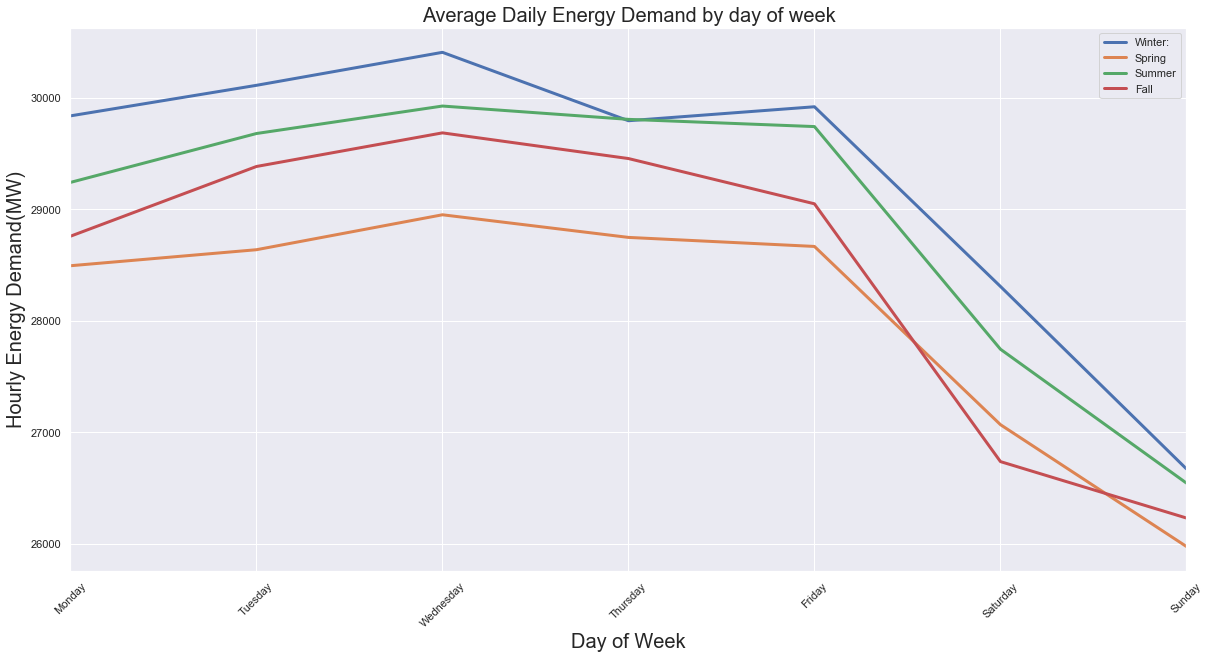

In [16]:
#plotting a line plot of the data
dow_demand_mean.plot.line(figsize=[20,10], linewidth=3)
plt.xticks(rotation=45)
plt.xlabel("Day of Week", size=20)
plt.ylabel("Hourly Energy Demand(MW)",size=20)
plt.title("Average Daily Energy Demand by day of week",size=20)
plt.rc("xtick",labelsize=20)
plt.rc("ytick",labelsize=20);

Patterns across the 4 seasons are similar. Demand strength is inline with previous analysis. 

Simply....Demand is lowest on Sundays, increasing up until Wednesday, gradually decreases to Friday with a rapid decrease into Saturday and Sunday. Difference in demand between weekends and weekdays is significant. Could be a reason to reduce working weeks to 4 days?

A plot of Hourly demand during 24 hours can better define the peak periods of daily demand. It is expected to see differences between the weekdays and the weekend during the different seasons.

## 4.  How does hourly demand change during the day during the 4 seasons(Weekday and Weekends)?

In [17]:
#dividing the seasonal data into weekdays and weekends 
winter_week=winter[winter.index.dayofweek<=5]
winter_weekend=winter[winter.index.dayofweek>5]

spring_week=spring[spring.index.dayofweek<=5]
spring_weekend=spring[spring.index.dayofweek>5]

summer_week=summer[summer.index.dayofweek<=5]
summer_weekend=summer[summer.index.dayofweek>5]

fall_week=fall[fall.index.dayofweek<=5]
fall_weekend=fall[fall.index.dayofweek>5]

In [18]:
#averaging the hourly data during the work week for every season
winter_hourly_week=winter_week.groupby(winter_week.index.hour).mean()
spring_hourly_week=spring_week.groupby(spring_week.index.hour).mean()
summer_hourly_week=summer_week.groupby(summer_week.index.hour).mean()
fall_hourly_week=fall_week.groupby(fall_week.index.hour).mean()


#creating a dataframe with the data for ease of plotting
seasons=pd.DataFrame({"Winter":winter_hourly_week,
             "Spring":spring_hourly_week,
            "Summer":summer_hourly_week,
            "Fall":fall_hourly_week})

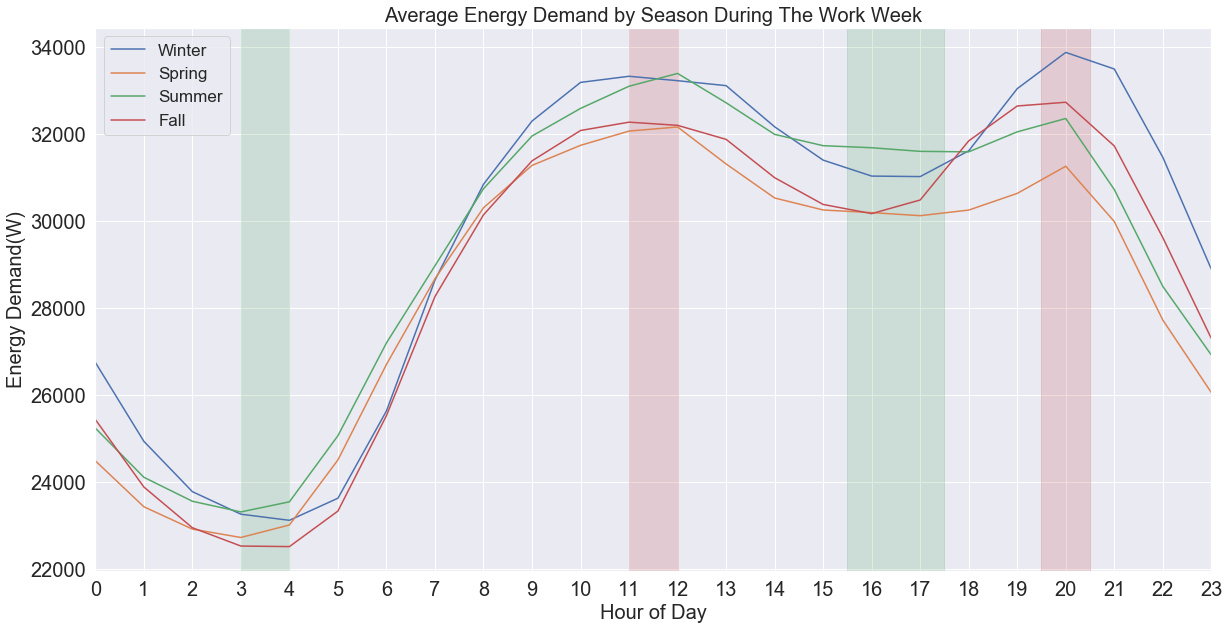

In [19]:
#plotting data
seasons.plot.line(figsize=[20,10])

#shaded areas for peak/low times
plt.axvspan(19.5,20.5,alpha=0.2,color='r')
plt.axvspan(11,12,alpha=0.2,color='r')
plt.axvspan(3,4,alpha=0.2,color='g')
plt.axvspan(15.5,17.5,alpha=0.2,color='g')

#plotting visualisation
plt.legend(prop={'size': 17})
plt.xlabel('Hour of Day',size=20)
plt.ylabel('Energy Demand(W)',size=20)
plt.title("Average Energy Demand by Season During The Work Week", size=20)
plt.xticks(list(winter_hourly_week.index.values));

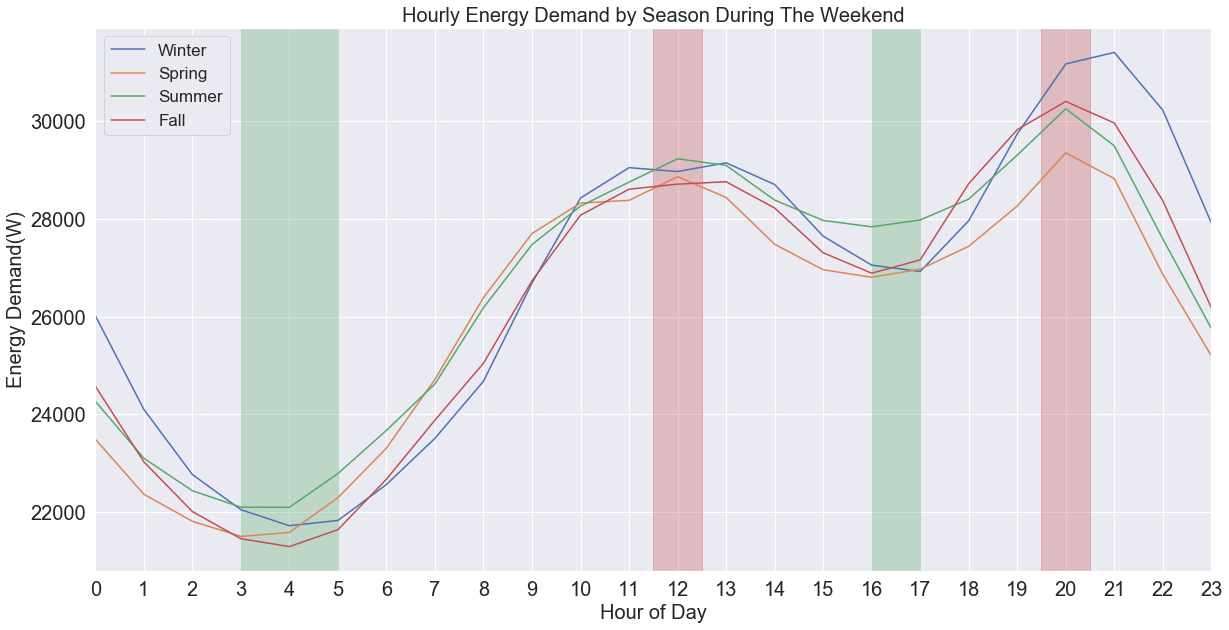

In [20]:
#averaging the hourly data during the  weekend for every season and creating a dataframe
winter_hourly_weekend=winter_weekend.groupby(winter_weekend.index.hour).mean()
spring_hourly_weekend=spring_weekend.groupby(spring_weekend.index.hour).mean()
summer_hourly_weekend=summer_weekend.groupby(summer_weekend.index.hour).mean()
fall_hourly_weekend=fall_weekend.groupby(fall_weekend.index.hour).mean()
seasons1=pd.DataFrame({"Winter":winter_hourly_weekend,
             "Spring":spring_hourly_weekend,
            "Summer":summer_hourly_weekend,
            "Fall":fall_hourly_weekend})

#plotting and shaded areas for peak/low times
seasons1.plot.line(figsize=[20,10])
plt.axvspan(19.5,20.5,alpha=0.3,color='r')
plt.axvspan(11.5,12.5,alpha=0.3,color='r')
plt.axvspan(3, 5,alpha=0.3,color='g')
plt.axvspan(16,17,alpha=0.3,color='g')

#plotting visualisation
plt.legend(prop={'size': 17})
plt.xlabel('Hour of Day',size=20)
plt.ylabel('Energy Demand(W)',size=20)
plt.title("Hourly Energy Demand by Season During The Weekend", size=20)
plt.xticks(list(winter_hourly_week.index.values));

## Peaks and Lows of the Day:


### **Morning**(2am - 10am)
- **Week**: Fall, spring & summer hit a demand low at 3am before it starts to increase while winter demands bottoms at a low later on at 4am. Perhaps this may be due to winter blues and a lack of motivation to start the day. All seasons tend to have the same demand at around 7am after which winter takes the lead with highest demand for the rest of the morning. Summer is second highest, followed by fall then spring.


- **Weekend** : A wider range of possibilities during the weekend. Fall, spring and summer all hit a low between 3-4am where winter bottoms out at 5am. With winter demand picking up later, it surpasses all seasons at around 9am signifying people waking up generally later on winter.
     

### **Noon/Afternoon**(10am - 7pm)

- **Week**: Peaks between 10am and 1pm(Offices at full capacity) before decreasing for lunchg hour reaching a low at 4/5pm.
- **Weekend** : Follows the same as during the week(Surprising!) except with a shift of the peak.
### **Night**(7pm -1am)
     
- **Week and Weekend**: Demand has a higher variance during the night than on mornings/afternoon. Winter, fall, summer spring is the order of descending demand. Demand peaks at 8pm for all cases except for winter weekends peaking at 9pm.

To conclude this sections the following points are to be noted from observations over the last 4 years:

1. Winter, Summer, Fall, Spring is the order of energy demand from highest to lowest.
2. Energy demand is increasing year to year but at a slower rate.
3. Daily Energy demand is around 10% less on the weekend than on weekdays.
4. Intraday hourly demand movements(lows/highs/speed of movement) are highly dependant on the time of day.
5. Intraday hourly demand magnitudes are dependant on the time of year.
6. Seasonality affects hourly pattern over the week and weekend.

Enough analysing demand alone......Let's dig into the weather dataset and see if weather features affect demand on different timescales...

# Section 1.2: Weather Data

# 1. How do weather features differ in across the year?

In [21]:
weather.head()

city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 04:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2015-01-01 00:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 02:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 03:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 04:00:00+00:00        78           0        23      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
dt_iso                                                                    
2015-01-01 00:00:00+00:00      0.0           0         800        clear   
2015-01-01 01:00:00+00:00      0.0           0         800        clear   
2015-01-01 02:00:00+00:00      0.0           0         800        clear   
2015-01-01 03:00:00+00:00      0.0           0         800        clear   
2015-01-01 04:00:00+00:00      0.0           0         800        clear   

                          weather_description weather_icon  
dt_iso                                                      
2015-01-01 00:00:00+00:00        sky is clear          01n  
2015-01-01 01:00:00+00:00        sky is clear          01n  
2015-01-01 02:00:00+00:00        sky is clear          01n  
2015-01-01 03:00:00+00:00        sky is clear          01n  
2015-01-01 04:00:00+00:00        sky is clear          01n

In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2015-01-01 00:00:00+00:00 to 2018-12-31 23:00:00+00:00
Data columns (total 16 columns):
city_name              178396 non-null object
temp                   178396 non-null float64
temp_min               178396 non-null float64
temp_max               178396 non-null float64
pressure               178396 non-null int64
humidity               178396 non-null int64
wind_speed             178396 non-null int64
wind_deg               178396 non-null int64
rain_1h                178396 non-null float64
rain_3h                178396 non-null float64
snow_3h                178396 non-null float64
clouds_all             178396 non-null int64
weather_id             178396 non-null int64
weather_main           178396 non-null object
weather_description    178396 non-null object
weather_icon           178396 non-null object
dtypes: float64(6), int64(6), object(4)
memory usage: 23.1+ MB


In [23]:
weather.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

The following observations need to be further examined:
1. The temperature shall be converted to Celsius as more relatable to get an insight from celsius.

2. The pressure seems to have abnormally high maximum values which seem impossible. This is a data error. These values are in Hecto Pascal. 1000 hPa is standard atmospheric pressure in the air. 10,000 HectoPascal is equivalent to a Sedan car being supported on the palm of an average human hand. This is enough to kill a person. Imagine 1,000,000 HectoPascal. Let's replace them with the mean for ease of analysis for now.

3. The maximum windspeed recorded seems unlikely to have occured given that the fastest wind speed ever recorded on earth is 103 m/s and a category 5 hurricane is 70m/s. Outliers need to be dealt with later.

In [24]:
#adding temperature in Celsius
weather["tempC"]=weather.temp-273.15

In [25]:
#removing outliers in pressure
indicies=weather[(weather.pressure<900) | (weather.pressure>1100)].pressure.index
for idx in indicies:
    weather.pressure.loc[idx]=weather.pressure.mean()

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
#removing outliers in wind speed
indicies=weather[weather.wind_speed>70].wind_speed.index
for idx in indicies:
    weather.wind_speed.loc[idx]=weather.wind_speed.mean()

Let's analyze some of the weatehr features using a line plot

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


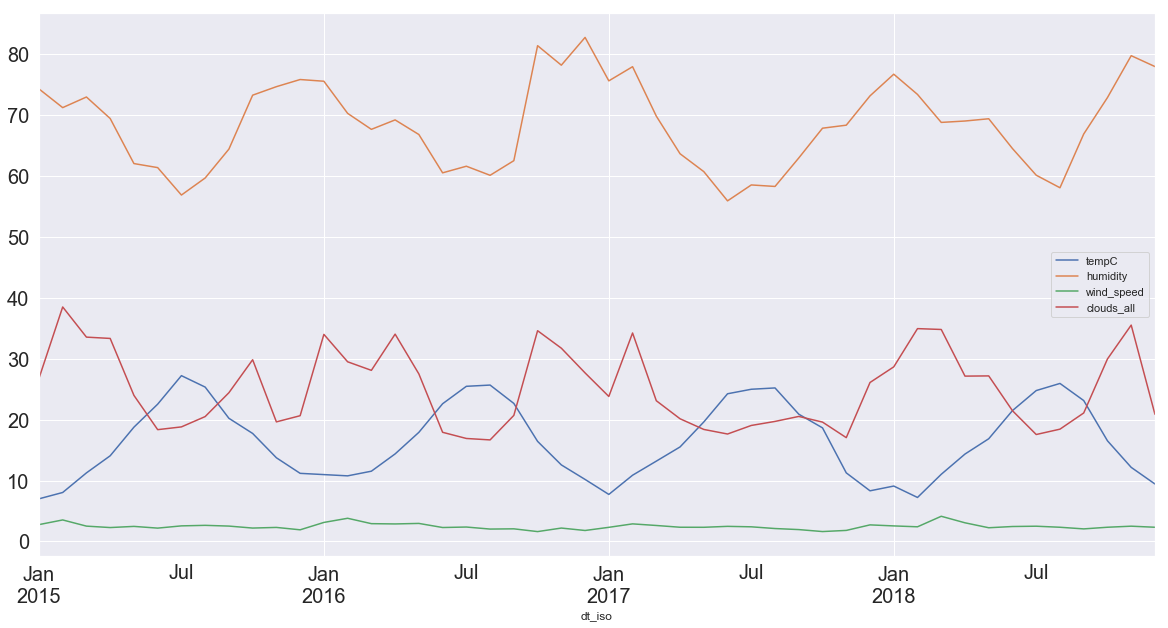

In [27]:
#plotting some weather features
weather[["tempC","humidity","wind_speed","clouds_all"]].resample("M").mean().plot.line(figsize=[20,10])
plt.legend(loc='right');

### Winter: 
- Temperature: Year Low
- Humdity: Year High
- Clouds: Year High

### Summer:
- Temperature: Year High
- Humdity: Year Low
- Clouds: Year Low

Spring and Fall are transition seasons.

### Spring:

- Temperature: Linearly increasing
- Humdity: Linearly decreasing
- Clouds: Linearly decreasing


 
 But first let's examine the other features that could not be visualized above such as Pressure, wind speed, wind direction, rain, snow and weather descriptions.

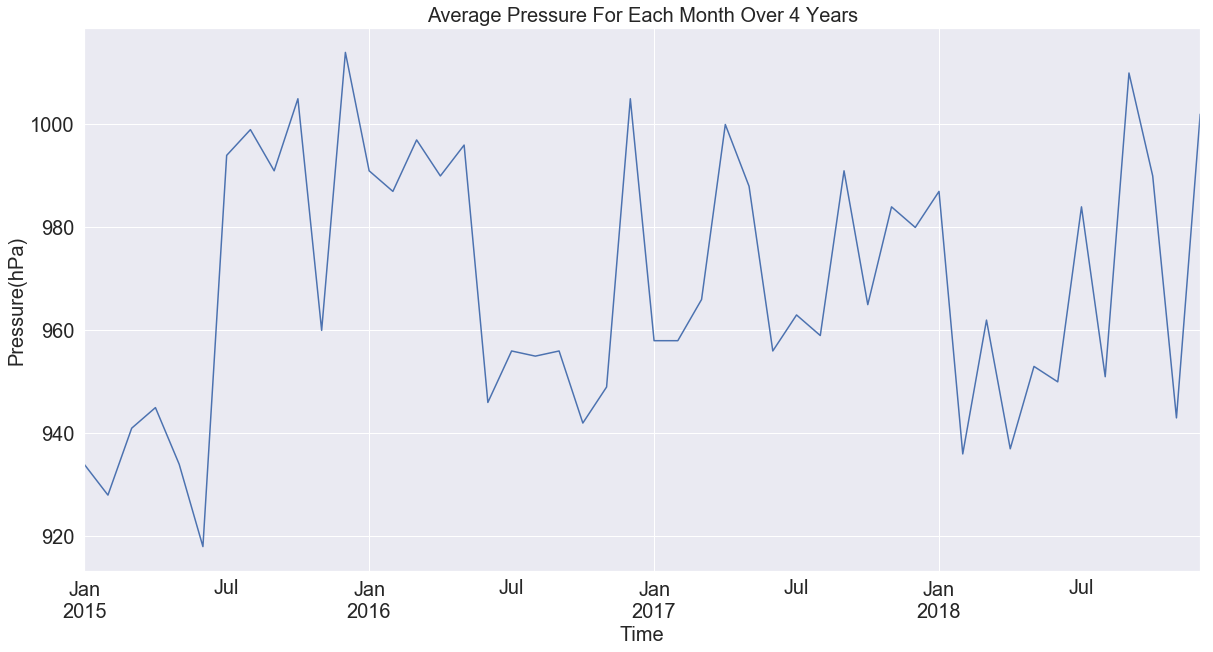

In [30]:
#Plotting pressure over the years
weather.pressure.resample("M").min().plot.line(figsize=[20,10])

plt.xlabel("Time",size=20)
plt.ylabel("Pressure(hPa)",size=20)
plt.title("Average Pressure For Each Month Over 4 Years",size=20);

There is no real patter emerging from pressure.

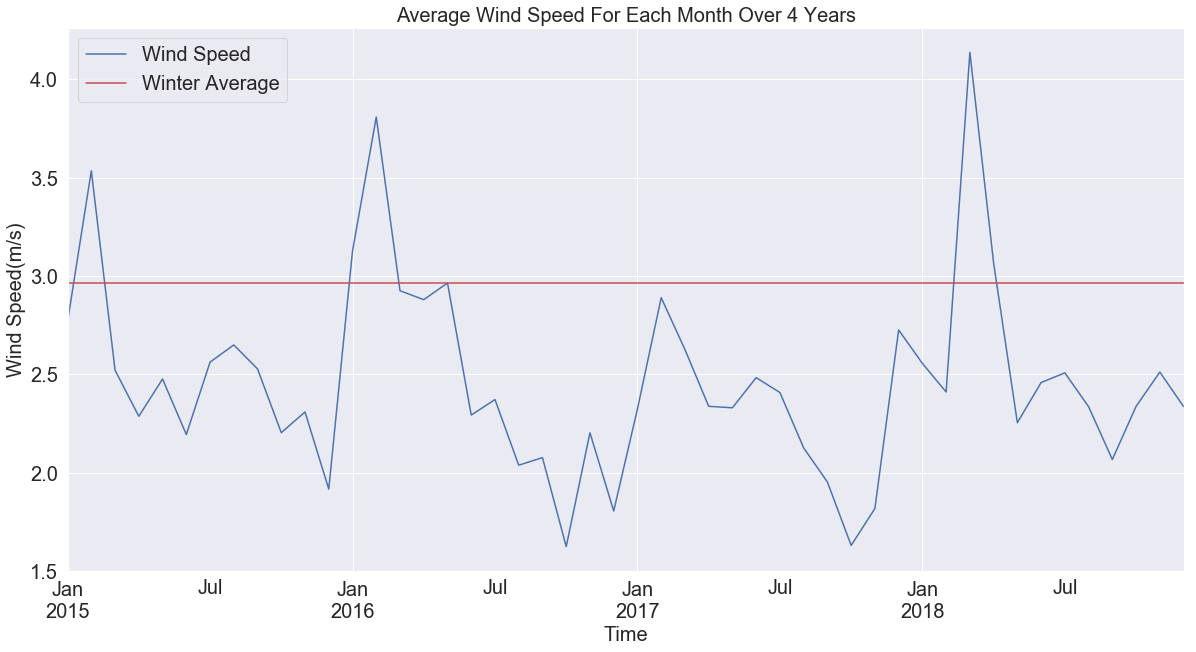

In [31]:
#plotting wind speed
weather.wind_speed.resample("M").mean().plot.line(figsize=[20,10],label='Wind Speed')
plt.xlabel("Time",size=20)
plt.ylabel("Wind Speed(m/s)",size=20)
plt.title("Average Wind Speed For Each Month Over 4 Years",size=20)

#plotting wind speed winter average over 4 years
plt.axhline(weather[(weather.index.month==1) | (weather.index.month==2) | (weather.index.month==3)].wind_speed.mean(),c='r',label='Winter Average')
plt.legend(prop={'size':20});

Wind Speed is highly variable during the year with a peak in winter and a low in summer as expected but....the range is between 1.5m/s and 4m/s. But as seen in 2017, the peak was way below the 4 year winter peak.

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


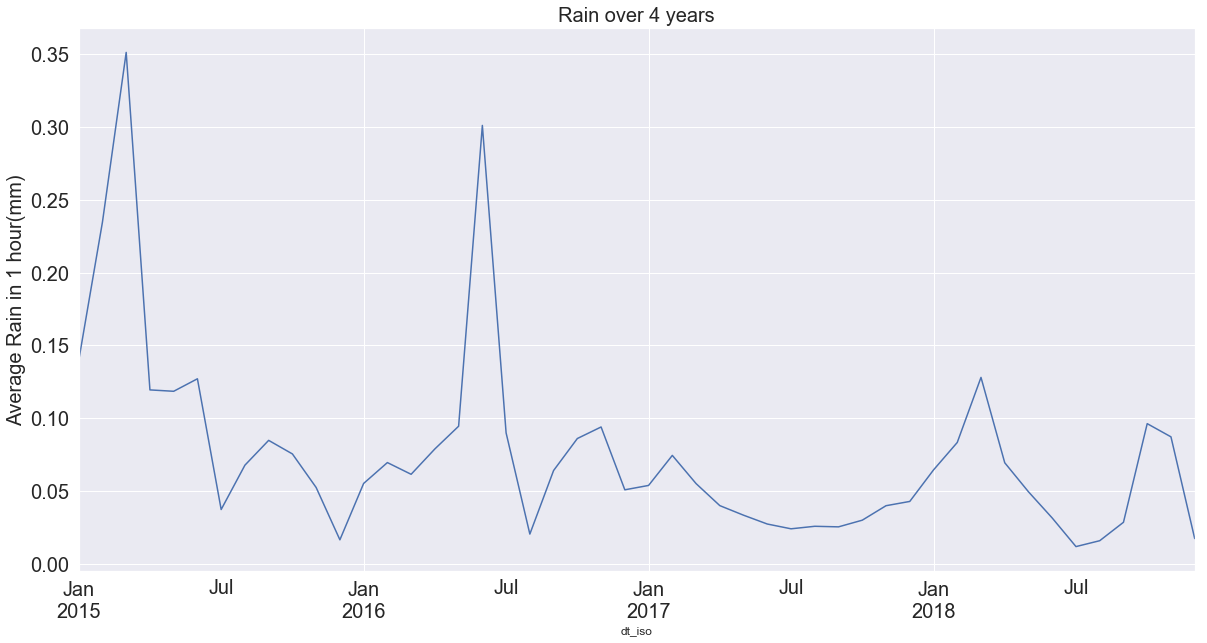

In [32]:
weather.rain_1h.resample("M").mean().plot.line(label='1 HOUR RAIN',figsize=[20,10])
plt.ylabel("Average Rain in 1 hour(mm)",size=20)
plt.title("Rain over 4 years",size=20);

We see that rain has been decreasing over the years. The peaks usually occur in winter as expected.

Finally let's see how the weather is described acorss the 4 years......

In [33]:
(weather['weather_description'].unique()), (weather['weather_main'].unique())

(array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
        'overcast clouds', 'light rain', 'moderate rain',
        'heavy intensity rain', 'mist', 'heavy intensity shower rain',
        'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
        'thunderstorm with light rain', 'thunderstorm with rain',
        'proximity thunderstorm', 'thunderstorm',
        'light intensity shower rain', 'light intensity drizzle', 'fog',
        'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
        'proximity shower rain', 'light intensity drizzle rain',
        'light snow', 'rain and snow', 'light rain and snow', 'snow',
        'light thunderstorm', 'heavy snow', 'sleet', 'rain and drizzle',
        'shower sleet', 'light shower sleet', 'light shower snow',
        'proximity moderate rain', 'ragged shower rain',
        'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
       dtype=object),
 array(['clear', 'clouds', 'rain', 'mist', 'thu

LEt's examin weather_main as it is a summary of weather_description

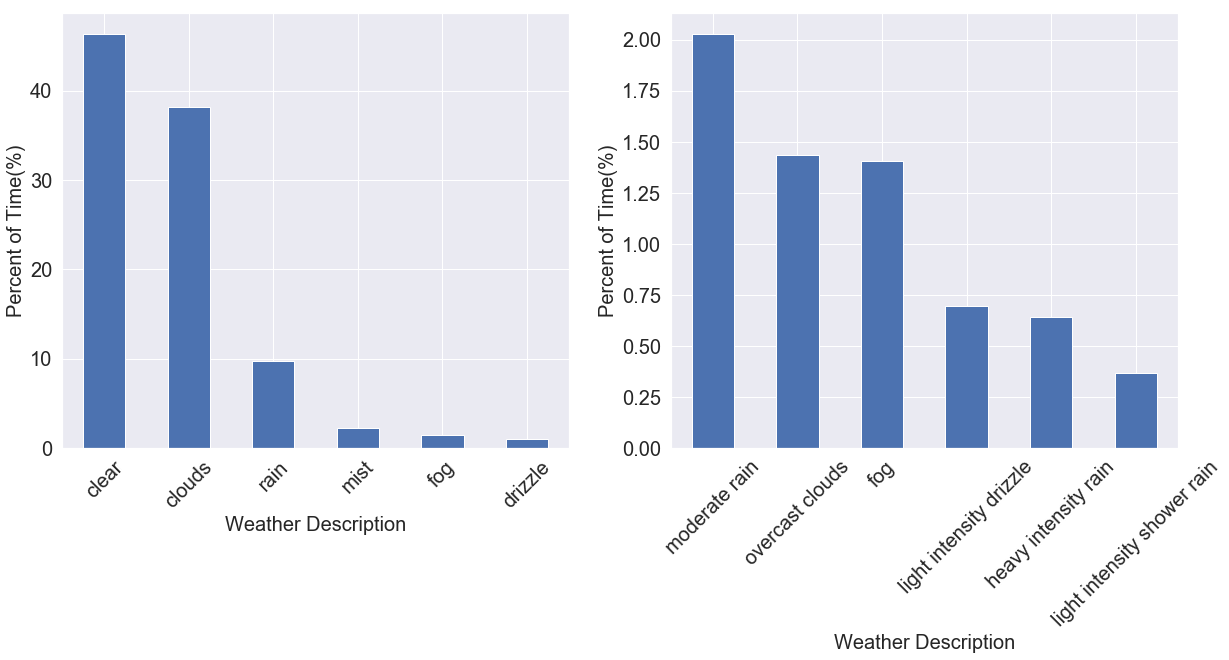

In [34]:
#plotting bar graphs for different counts weather descriptions normalized to gain a better persepective of the distribution

plt.figure(figsize=[20,8])


plt.subplot(1,2,1)
(weather['weather_main'].value_counts(normalize=True)*100)[0:6].plot.bar()

plt.xticks(rotation=45)
plt.xlabel("Weather Description",size=20)
plt.ylabel("Percent of Time(%)",size=20);

plt.subplot(1,2,2)
(weather['weather_description'].value_counts(normalize=True)[6:12]*100).plot.bar()

plt.xticks(rotation=45)
plt.xlabel("Weather Description",size=20)
plt.ylabel("Percent of Time(%)",size=20);


Unsuprisingly, for a country like Spain, 45% of the year the sky is clear, 40% is a variation of clouds during which it is raining 12% of the time. The minority of the time is divided between snow, fog, dust and mist.

# 2. How do weather features differ across over 24 hours?

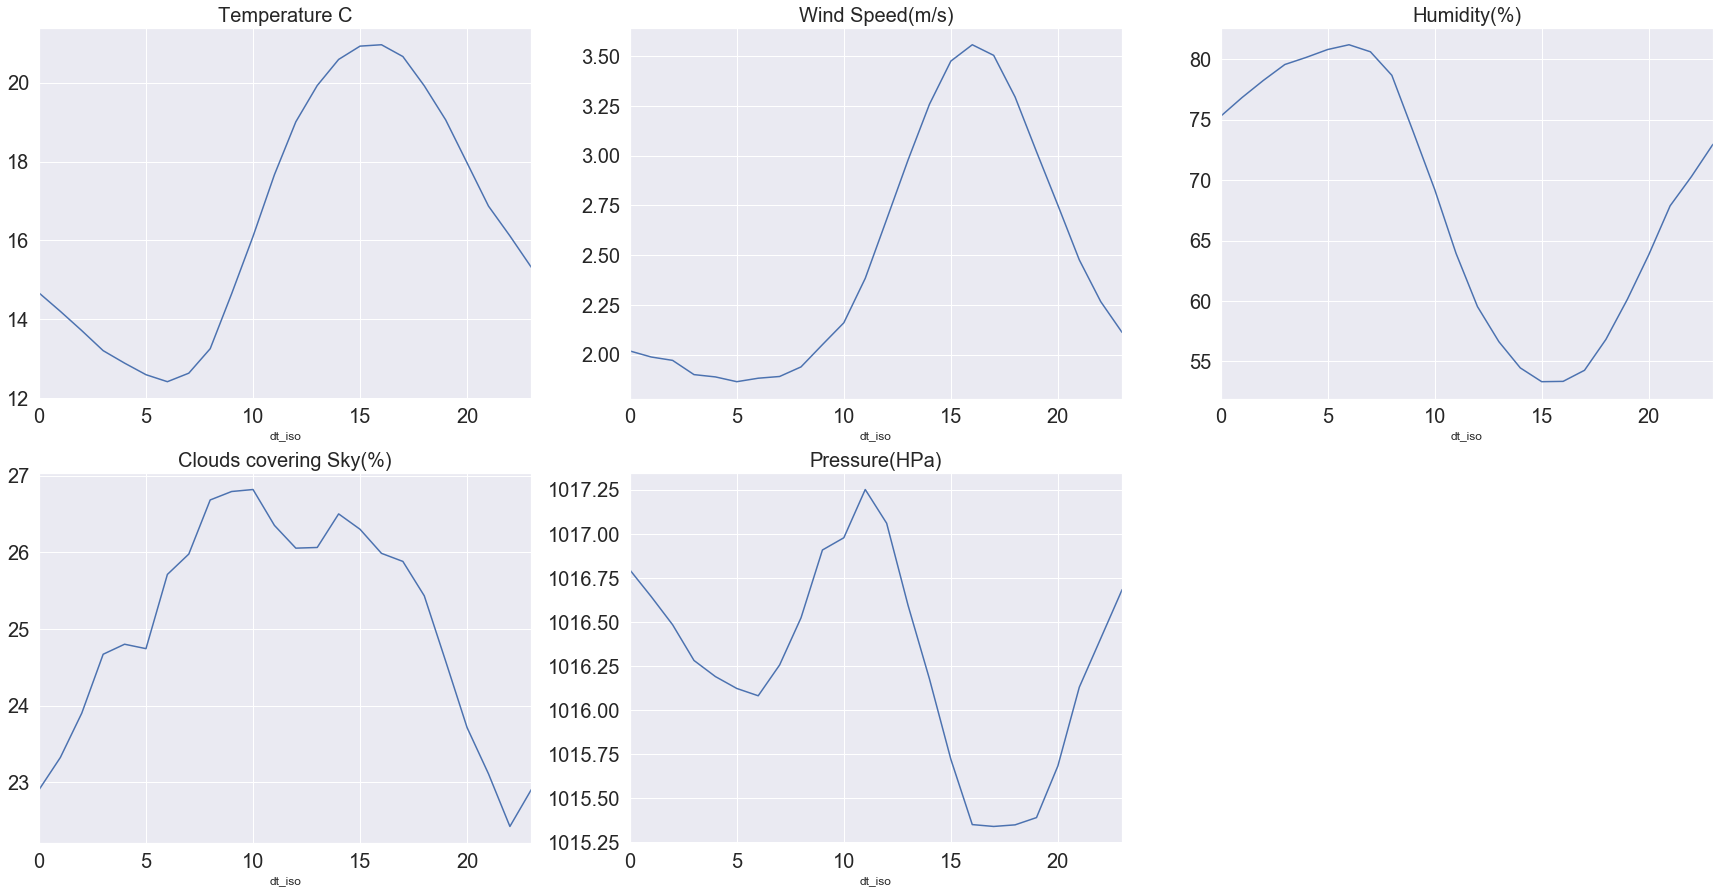

In [35]:
plt.figure(figsize=[30,15])
plt.subplot(2,3,1)

#plotting the mean hourly temperature for the year
weather.tempC.groupby(weather.index.hour).mean().plot()
plt.title("Temperature C", size=20)

#plotting the mean hourly pressure for the year
plt.subplot(2,3,5)
weather.pressure.groupby(weather.index.hour).mean().plot()
plt.title("Pressure(HPa)", size=20)

#plotting the mean hourly humidity for the year
plt.subplot(2,3,3)
weather.humidity.groupby(weather.index.hour).mean().plot()
plt.title("Humidity(%)", size=20)

#plotting the mean hourly cloud formation for the year
plt.subplot(2,3,4)
weather.clouds_all.groupby(weather.index.hour).mean().plot()
plt.title("Clouds covering Sky(%)", size=20)

#plotting the mean hourly wind_speed formation for the year
plt.subplot(2,3,2)
weather.wind_speed.groupby(weather.index.hour).mean().plot()
plt.title("Wind Speed(m/s)", size=20);

- **Temperature, Wind Speed**': Low of 12 C at 6am -> increasing linearly to 25C at 3pm -> linearly decreasing until 6am. 

- **Humidity**: Humidity pattern is the opposite of temperature. A low of 55% and a high of 80%.

- **Clouds in the Sky**: Low of ~20% at 9pm, increasing and stabilising to ~26-27% between 10am and 3pm before sharply decreasing until 9pm. Looks like a refelection of increased temperature on water sources increases clouds only on the intraday as that is not the case on the larger timeframe.

- **Pressure**: Low at around 5/6pm, increasing until 12am, sharply decreasing until 5am, increasing until 11am before decreasing again to 5/6pm.  The total range of an average day is between 1015.5 hPa and 1017.25 hPa. 

In [36]:
weather.describe()

temp       temp_min       temp_max       pressure  \
count  178396.000000  178396.000000  178396.000000  178396.000000   
mean      289.618605     288.330442     291.091267    1016.267997   
std         8.026199       7.955491       8.612454      12.437780   
min       262.240000     262.240000     262.240000     918.000000   
25%       283.670000     282.483602     284.650000    1013.000000   
50%       289.150000     288.150000     290.150000    1018.000000   
75%       295.150000     293.730125     297.150000    1022.000000   
max       315.600000     315.150000     321.150000    1090.000000   

            humidity     wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.000000  178396.000000  178396.000000   
mean       68.423457       2.469794     166.591190       0.075492   
std        21.902888       2.072947     116.611927       0.398847   
min         0.000000       0.000000       0.000000       0.000000   
25%        53.000000       1.000000      55.000000       0.000000   
50%        72.000000       2.000000     177.000000       0.000000   
75%        87.000000       4.000000     270.000000       0.000000   
max       100.000000      64.000000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  \
count  178396.000000  178396.000000  178396.000000  178396.000000   
mean        0.000380       0.004763      25.073292     759.831902   
std         0.007288       0.222604      30.774129     108.733223   
min         0.000000       0.000000       0.000000     200.000000   
25%         0.000000       0.000000       0.000000     800.000000   
50%         0.000000       0.000000      20.000000     800.000000   
75%         0.000000       0.000000      40.000000     801.000000   
max         2.315000      21.500000     100.000000     804.000000   

               tempC  
count  178396.000000  
mean       16.468605  
std         8.026199  
min       -10.910000  
25%        10.520000  
50%        16.000000  
75%        22.000000  
max        42.450000

# 3. How do weather features correlate to each other?

The scatter matrix plot function from pandas can easily identify where correlations exist and if they need further analysis to confirm. But it's best to resample the data by half days to better see patterns.

In [37]:
from pandas.plotting import scatter_matrix

In [38]:
#choosing the features that will be exmained for correlations
weather_features=weather[['tempC','humidity','wind_speed','clouds_all','pressure']].resample("12h").mean()

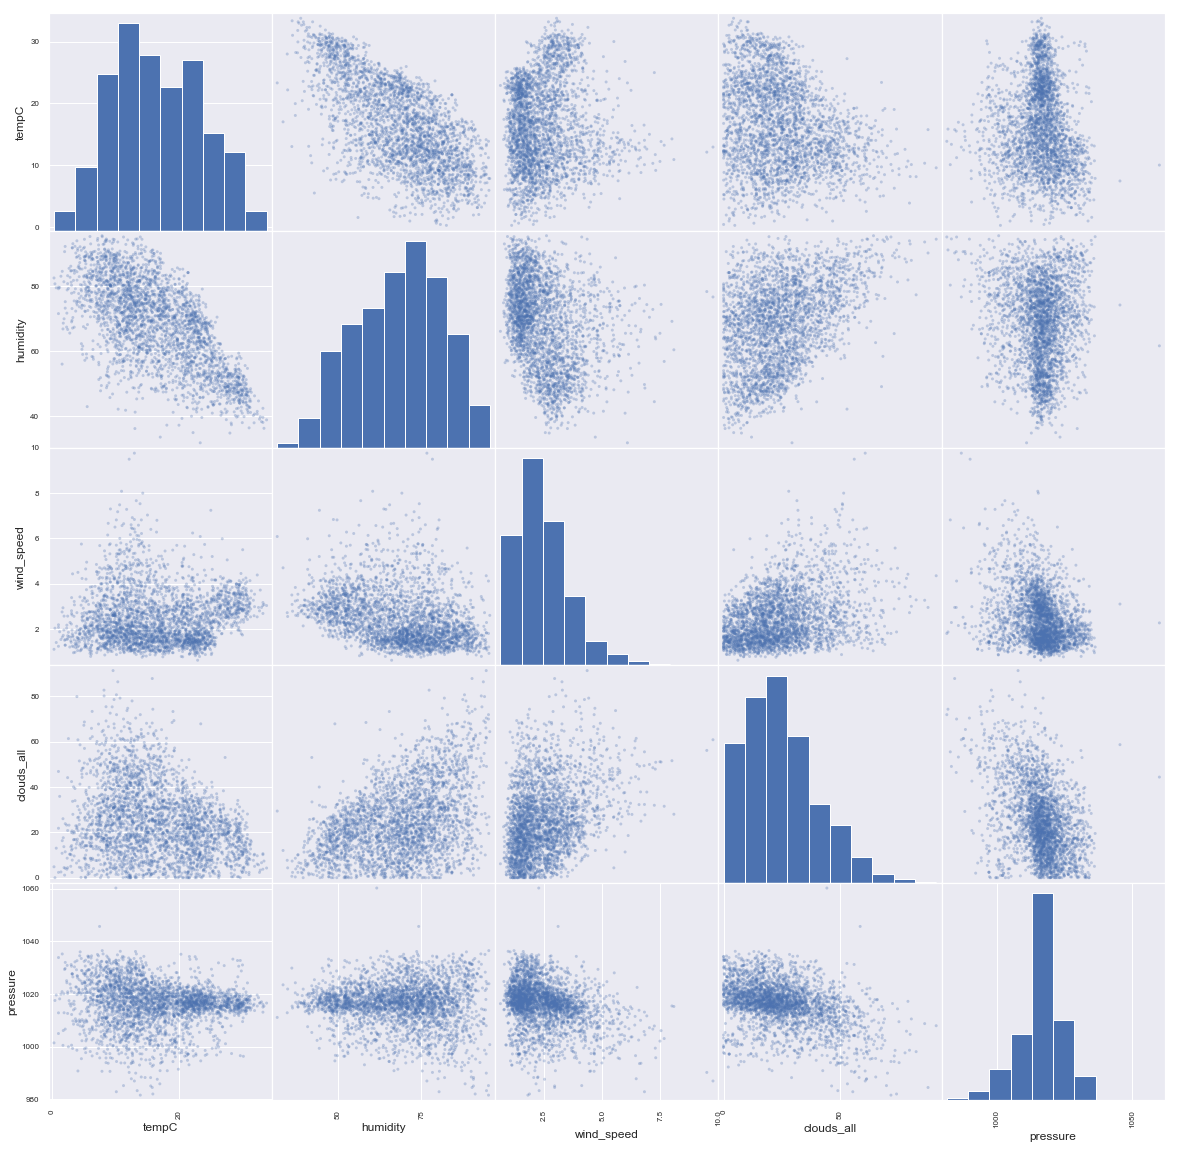

In [39]:
scatter_matrix(weather_features, alpha=0.3, figsize=[20,20])
plt.show()

The following observation can be confirmed with further analysis:
 1. Negative relationship between Temperature and Humdity
 2. Negative relationship between Temperature and Cloud formation
 3. Positive relationship between Humdity and Cloud formation
 4. Negative relationship between Wind Speed and Humidity
 5. Positive relationship between Wind Speed and Cloud formation
 6. Negative relationship between Pressure and Cloud formation.
 7. Negative relationship between Pressure and Wind Speed.
 
Some of these relationships are overlapping so only some analysis of the above will be confirmed.

Let's start with Temperature and Humidity....

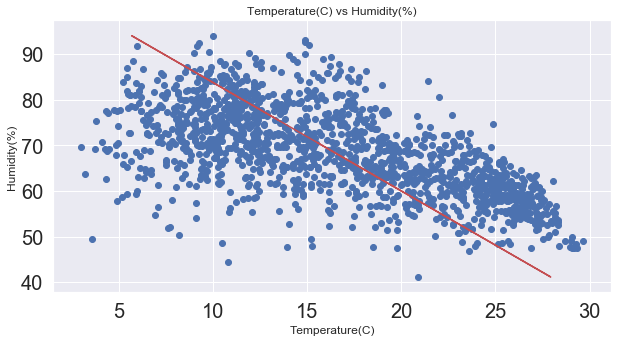

In [40]:
#generating numpy arrays for humidity and temperature for daily data points averaged from hourly data
hum = weather.humidity.resample('D').mean().values
tempc = weather.tempC.resample('D').mean().values

#generating points for a best fit line
slope, int_ = np.polyfit(hum,tempc, deg=1)
temps_c=slope*hum+int_

#plotting scatter plot and the best fit line
plt.figure(figsize=[10,5])

plt.plot(temps_c,hum, color='r')
plt.scatter(tempc, hum)
plt.ylabel("Humidity(%)")
plt.xlabel("Temperature(C)")
plt.title("Temperature(C) vs Humidity(%)");

It is clear that there is a linear negative relationship between temperature and humidity. Higher Temperature leads to lower humidity.

Does higher humidity mean more cloud formation?

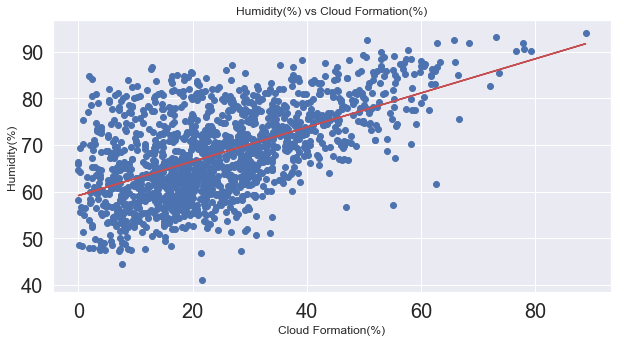

In [41]:
#generating numpy arrays for humidity and cloud data for daily data points averaged from hourly data
cloud = weather.clouds_all.resample('D').mean().values
hum = weather.humidity.resample('D').mean().values

#generating points for a best fit line
slope, int_ = np.polyfit(cloud,hum, deg=1)
hum_pred=slope*cloud+int_

#plotting scatter plot and the best fit line
plt.figure(figsize=[10,5])
plt.scatter(cloud, hum)
plt.xlabel("Cloud Formation(%)")
plt.ylabel("Humidity(%)")
plt.title("Humidity(%) vs Cloud Formation(%)")
plt.plot(cloud, hum_pred,color='r');

There is a strong positive linear relationship evident. Higher humidity means more clouds.
Given the negative relationship between temp and humidity, it can be assumed that lower temps correlate to more clouds. 

Might pressure affect wind speed?

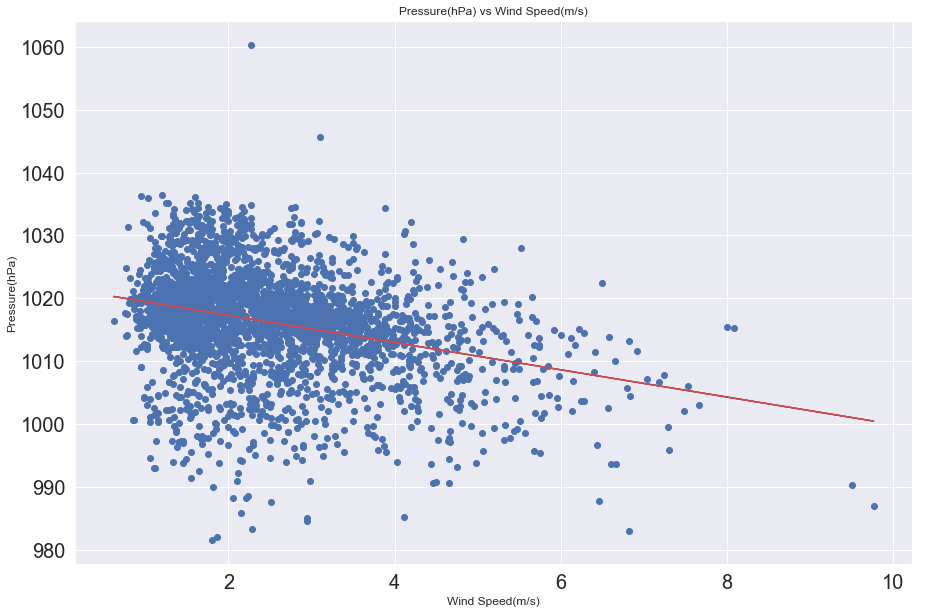

In [42]:
#generating numpy arrays for humidity and cloud data for daily data points averaged from hourly data
wind_sp = weather_features.wind_speed.resample('12H').mean().values
press = weather_features.pressure.resample('12H').mean().values


#plotting scatter plot and the best fit line
plt.figure(figsize=[15,10])
plt.scatter(wind_sp, press)
plt.ylabel("Pressure(hPa)")
plt.xlabel("Wind Speed(m/s)")
plt.title("Pressure(hPa) vs Wind Speed(m/s)")

#generating points for a best fit line
slope, int_ = np.polyfit(wind_sp,press, deg=1)
press_pred=slope*wind_sp+int_
plt.plot(wind_sp,press_pred,c='r');

Indeed there is a weak negative correlation between windspeed and pressure. 


What about Wind Speed and Cloud formation?

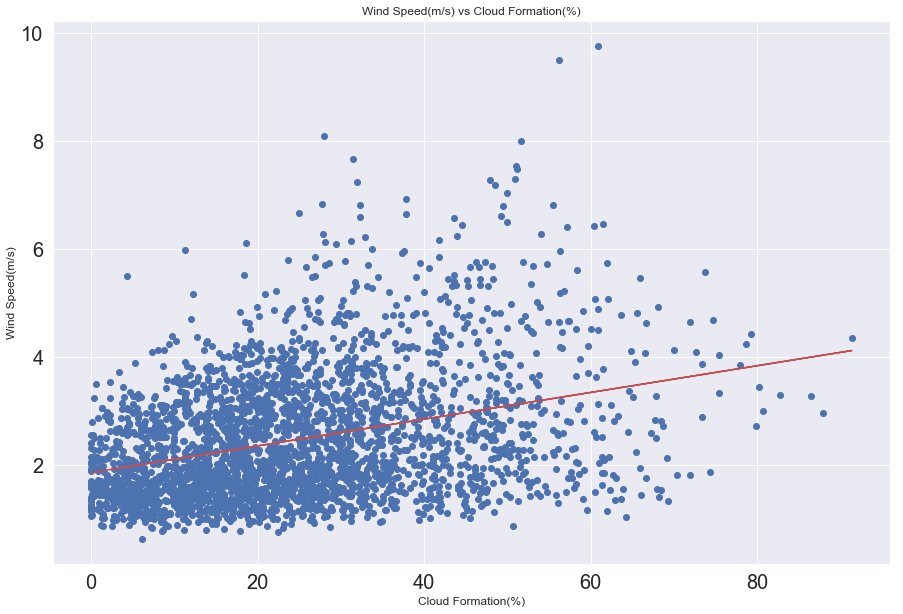

In [43]:
wind_sp = weather_features.wind_speed.resample('12H').mean().values
cloud = weather_features.clouds_all.resample('12H').mean().values
plt.figure(figsize=[15,10])
plt.scatter(cloud,wind_sp)
plt.xlabel("Cloud Formation(%)")
plt.ylabel("Wind Speed(m/s)")
plt.title("Wind Speed(m/s) vs Cloud Formation(%)")
slope, int_ = np.polyfit(cloud,wind_sp, deg=1)
wind_sp_pred=slope*cloud+int_
plt.plot(cloud,wind_sp_pred,c='r');

If more clouds are seen in the sky then it is expected to feel a higher wind speed. But it is probably not directly related.

# Section 1.3: Demand & Weather Data

In [44]:
len(weather), len(energy)

(178396, 35064)

In [45]:
weather.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

The weather and energy datasets are not the same length. That is because the weather data is for 5 spanish cities that are spaced well around the corners of Spain.

The average of the weather features for the different cities should be a good indicator of the overall weather.

In [46]:
#averaging the data for the spanish cities
avg_weather=weather.groupby(weather.index).mean()

In [47]:
len(avg_weather), len(energy)

(35064, 35064)

In [48]:
avg_weather.head()

temp    temp_min    temp_max  pressure  \
dt_iso                                                                    
2015-01-01 00:00:00+00:00  272.491463  272.491463  272.491463    1016.4   
2015-01-01 01:00:00+00:00  272.512700  272.512700  272.512700    1016.2   
2015-01-01 02:00:00+00:00  272.099137  272.099137  272.099137    1016.8   
2015-01-01 03:00:00+00:00  272.089469  272.089469  272.089469    1016.6   
2015-01-01 04:00:00+00:00  272.145900  272.145900  272.145900    1016.6   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2015-01-01 00:00:00+00:00      82.4         2.0     135.2      0.0      0.0   
2015-01-01 01:00:00+00:00      82.4         2.0     135.8      0.0      0.0   
2015-01-01 02:00:00+00:00      82.0         2.4     119.0      0.0      0.0   
2015-01-01 03:00:00+00:00      82.0         2.4     119.2      0.0      0.0   
2015-01-01 04:00:00+00:00      82.0         2.4     118.4      0.0      0.0   

                           snow_3h  clouds_all  weather_id     tempC  
dt_iso                                                                
2015-01-01 00:00:00+00:00      0.0         0.0       800.0 -0.658537  
2015-01-01 01:00:00+00:00      0.0         0.0       800.0 -0.637300  
2015-01-01 02:00:00+00:00      0.0         0.0       800.0 -1.050862  
2015-01-01 03:00:00+00:00      0.0         0.0       800.0 -1.060531  
2015-01-01 04:00:00+00:00      0.0         0.0       800.0 -1.004100

Let's see how temperature, pressure, himidity and wind speed affect demand.

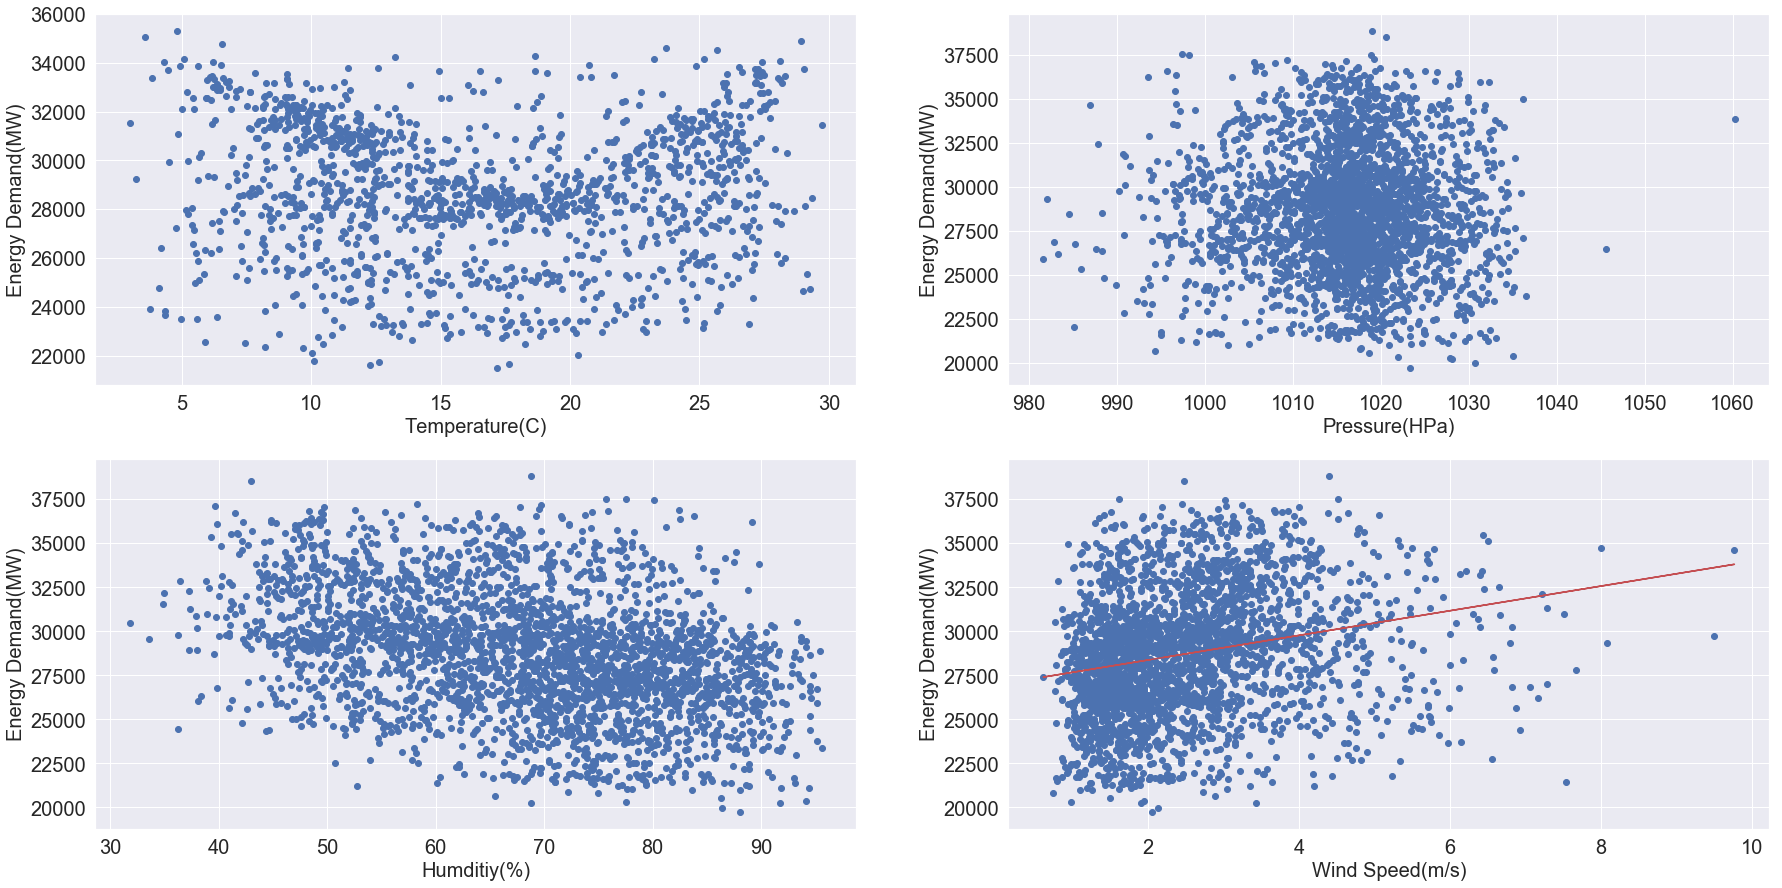

In [49]:
plt.figure(figsize=[30,15])

plt.subplot(2,2,1)
tempc=avg_weather.tempC.resample('D').mean()
dem_1=demand.resample('D').mean()

plt.scatter(tempc,dem_1)
plt.xlabel("Temperature(C)",size=20)
plt.ylabel("Energy Demand(MW)",size=20)

;
plt.subplot(2,2,2)
press = avg_weather.pressure.resample('12H').mean()
dem_2= demand.resample('12H').mean()

plt.scatter(press,dem_2)
plt.xlabel("Pressure(HPa)",size=20)
plt.ylabel("Energy Demand(MW)",size=20)
;

plt.subplot(2,2,3)
hum = avg_weather.humidity.resample('12H').mean()
dem_3= demand.resample('12H').mean()

plt.scatter(hum,dem_3)
plt.xlabel("Humditiy(%)",size=20)
plt.ylabel("Energy Demand(MW)",size=20)
;

plt.subplot(2,2,4)
wind_sp = avg_weather.wind_speed.resample('12H').mean().values
dem_4= demand.resample('12H').mean().values

plt.scatter(wind_sp,dem_4)
plt.xlabel("Wind Speed(m/s)",size=20)
plt.ylabel("Energy Demand(MW)",size=20)

slope, int_ =np.polyfit(wind_sp,dem_4, deg=1)
demand_pred=slope*wind_sp+int_
plt.plot(wind_sp,demand_pred, color='r');

- 1. Temperature: A parabolic relationship is evident with demand. Demand peaks at around 5 degC and 30 degC temperatures but the lows occurs at around 15-20 degC with almost no change in demand.
- 2. Pressure: Demand and pressure do not seem to be correlated.
- 3. Humidity: Demand and Humidity seem to be parabolical correlated which is expected as Temperature and Humdity are negatively related.
- 4. Wind Speed: A highly variant positive correlation is evident with energy demand. 

Given that temperature shows some relationship of demand, let's see one more time how the temperature and demand change over the day....

In [51]:
#average hourly temperature of every day for 4 years
hourly_temp=avg_weather.tempC.groupby(avg_weather.index.hour).mean()

#average hourly demand of every day for 4 years reduced demand degree for easy of plotting
hourly_demand=(demand.groupby(demand.index.hour).mean()/1000)

dem_tem=pd.DataFrame({"Temperature":hourly_temp,
                       "Demand":hourly_demand
                     });

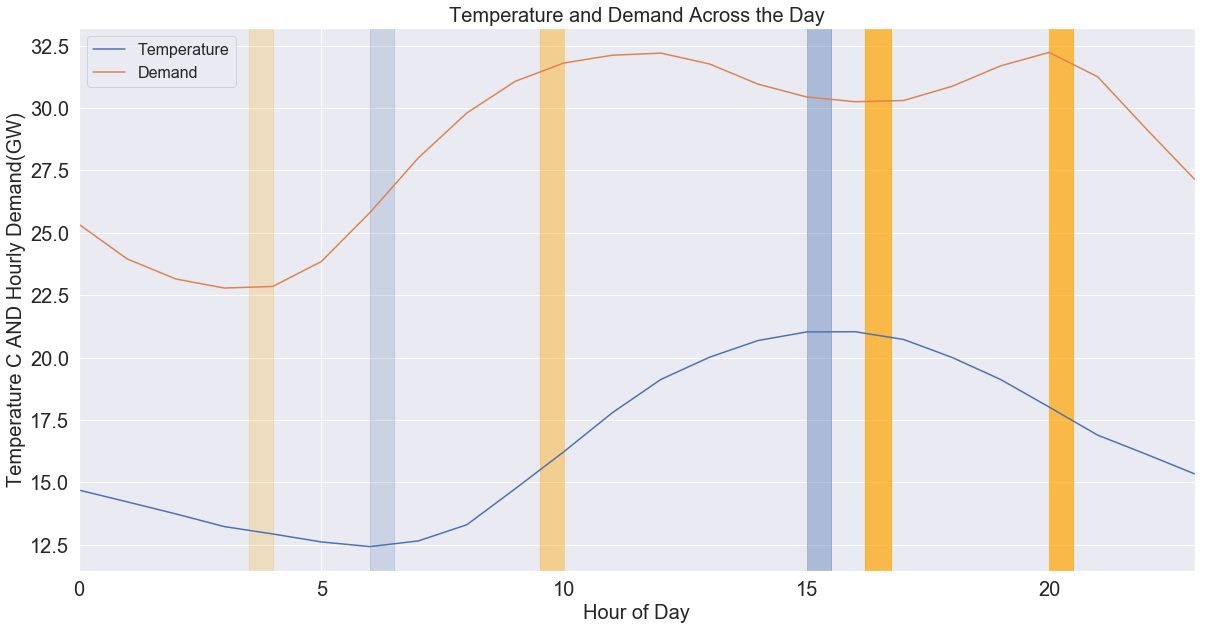

In [52]:
#Line plot set up
dem_tem.plot.line(figsize=[20,10])
plt.ylabel("Temperature C AND Hourly Demand(GW)",size=20)
plt.xlabel("Hour of Day",size=20)
plt.title("Temperature and Demand Across the Day", size=20)
plt.legend(prop={"size":16})

plt.axvspan(3.5,4, color='orange',alpha=0.2)
plt.axvspan(6,6.5, color='b',alpha=0.2)

plt.axvspan(9.5,10, color='orange',alpha=0.4)
plt.axvspan(15,15.5, color='b',alpha=0.4)

plt.axvspan(16.2,16.75, color='orange',alpha=0.7)
plt.axvspan(20,20.5, color='orange',alpha=0.7);

- Temperature hits a low at 6am  -- Demand hits a low at 4am.
- Temperature hits a high at 3pm  -- Demand hits a high at 10am.
- Temperature decreasing until 6am -- Demand hits a low at 4:30pm.
- Temperature decreasing until 6am -- Demand hits a high at 8pm.


This analysis suggests that intraday demand movements are not fully predicted by temperature changes. Let's rewind and have a deeper look at monthly demand vs average monthly temperature...

In [54]:
#average hourly temperature of every month for 4 years
monthly_temp=avg_weather.tempC.groupby(avg_weather.index.month).mean()

#average hourly demand of every month for 4 years reduced demand degree for easy of plotting
monthly_demand=(demand.groupby(demand.index.month).mean()/1000)
x=monthly_demand.index;

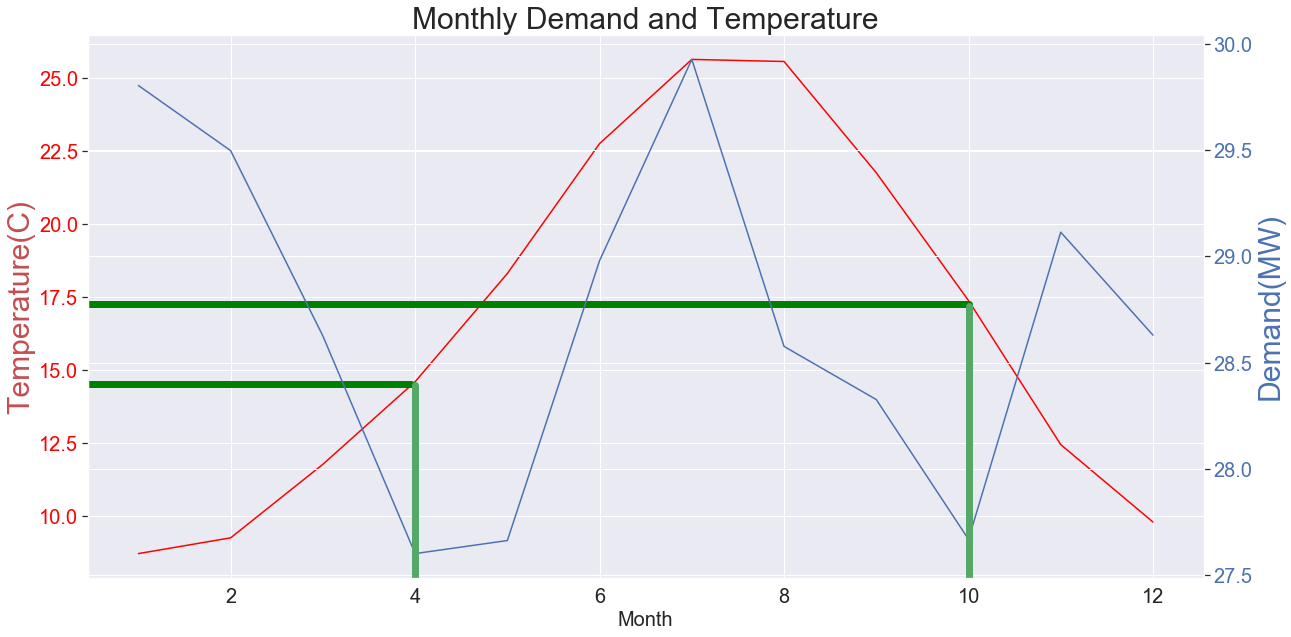

In [55]:
#plotting both variables on twin axis
fig, ax1 = plt.subplots(figsize=(20,10))

#plotting temperature on main y-axis
ax1.plot(x, monthly_temp.values, c='red',label=['Demand'])
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylabel("Temperature(C)",size=30, color='r')
ax1.set_xlabel("Month",size=20)

plt.axhline(14.5,color='green',linewidth=7,xmax=0.29)
plt.axhline(17.25,color='green',linewidth=7,xmax=0.79)

#utilize a second y-axes that shares the same x-axis
ax2 = ax1.twinx()  


#plotting daily temperature values
ax2.plot(x, monthly_demand.values)
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylabel("Demand(MW)",size=30, color='b')


plt.axvline(4,c='g',linewidth=7, ymax=0.355)
plt.axvline(10,c='g',linewidth=7,ymax=0.5)
plt.title("Monthly Demand and Temperature",size=30);

This is just a confirmation of the hyptheses that temperature and demand are related on a larger time scale. 

During April, we move from winter to summer, the average monthly temperature at which a demand low is reach is at around 14.5 C
As we move from summer to winter, the average monthly temperature at which a demand low is reach is at around 17.5 C.

# To conclude this section:

# Intraday Demand/Weather

1. Intraday demand movement is fully dependant on behaviour of people.
2. Intraday demand magnitude is dependant on the temperature(Which is depedndant on time of year).


# Monthly Demand/Weather

1. Monthly demand magnitude and movement is depedendant on temperature and maybe wind.

This is why accurate weather forecasts from geoligists will enable an accurate prediction for energy demand. 

Looking at energy generation can enable energy companies to understand how our generation has changed over the years and how weather features is affecting source distribution...

Jsut some questions that trigger curiosity......
1. Is monthly energy generation meeting demand?
2. How does wind speed affect energy generation from wind power?
3. When is the best season for wind energy generation?
4. When is the best season for Solar energy generation?
5. How did energy disttributyion change over the years?

# Section 1.4: Demand & Weather Data

## 1. Is energy generation always meeting demand on different timescales?

In [56]:
energy.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [57]:
#creating a df holding monthly energy generation sources generation
generation=energy.loc[:,:'generation wind onshore']

Let's start on a larger timeframe and plot energy demand vs energy generation aggregated by month over the last 4 years

In [58]:
#creating a series for total monthly energy generation from all sources and energy demand  
monthly_demand=demand.resample('M').sum()
monthly_generation=generation.resample('M').sum().sum(axis=1)

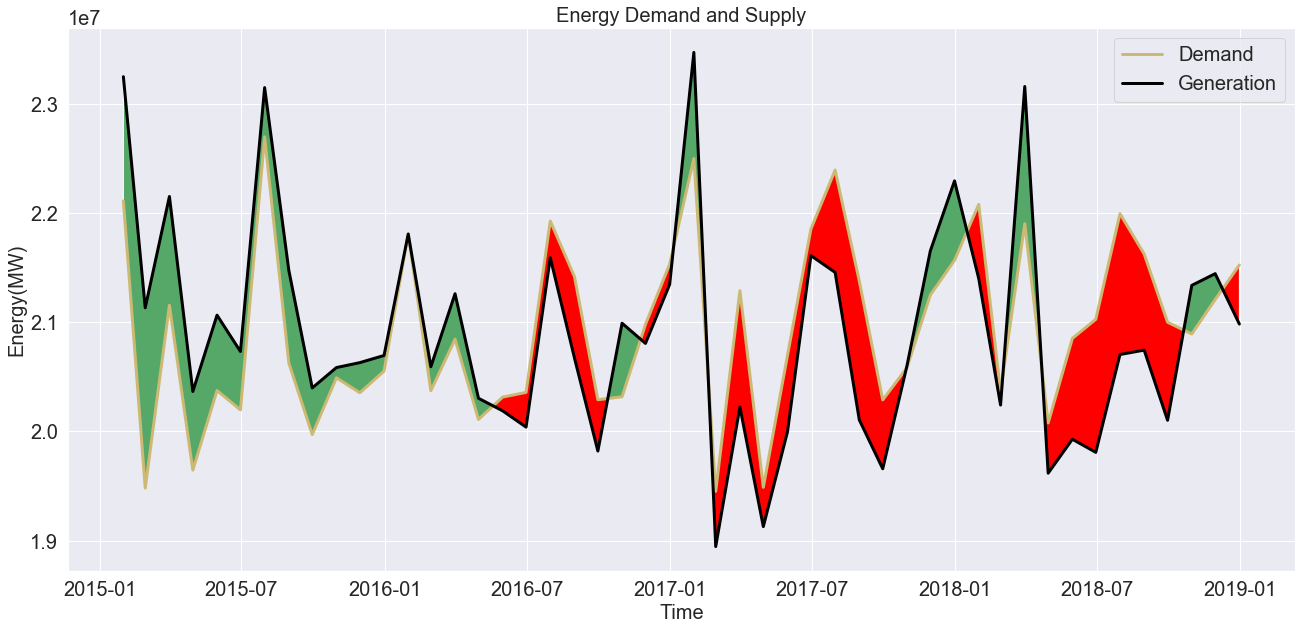

In [59]:
#setting variables for ease of plotting
y1=monthly_demand
y2=monthly_generation
x=monthly_demand.index

#plotting line plots
plt.figure(figsize=[22,10])
plt.plot(x,y1,linewidth=3, label='Demand', color='y')
plt.plot(x,y2,label='Generation', linewidth=3,color='black')
plt.legend(prop={'size': 20})
plt.xlabel("Time",size=20)
plt.ylabel("Energy(MW)",size=20)
plt.title("Energy Demand and Supply",size=20)

#filling gaps between curves in order to show energy surplus and deficits
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='g',interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red',interpolate=True);

- The green shaded areas is where generation is meeting demand with no problems.
- The red shaded areas is where generation is not meeting demand.
- From the start of 2015 to the end of 2016, Spain had no issues meeting demand.
- From the start of 2017 until the end of 2018, there were issues meeting demand. This is a sign of weak forecasts. 

How does hourly demand and generation related to each other on an intraday timescale?

In [60]:
#setting up hourly series for demand and supply
hourly_demand=demand.groupby(demand.index.hour).sum()
hourly_generation=generation.groupby(generation.index.hour).sum().sum(axis=1)

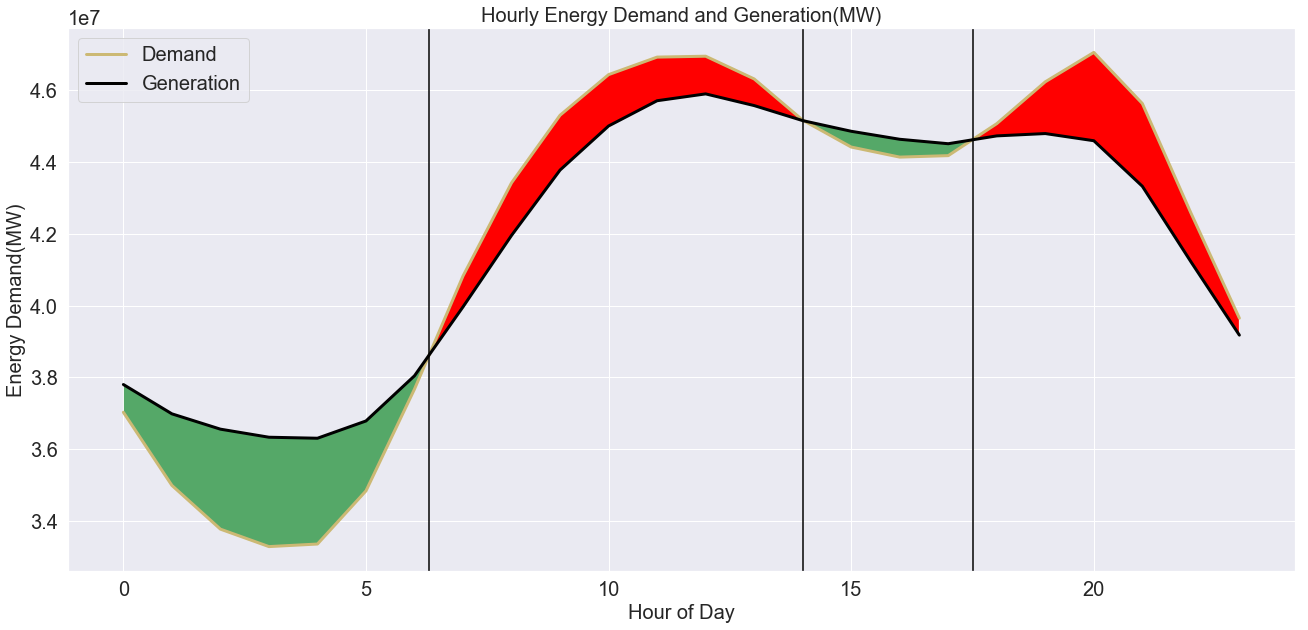

In [61]:
#setting up variables for ease of plotting
y1=hourly_demand
y2=hourly_generation
x=hourly_demand.index

#plotting line plots
plt.figure(figsize=[22,10])
plt.plot(x,y1,linewidth=3, label='Demand', color='y')
plt.plot(x,y2,label='Generation', linewidth=3,color='black')
plt.legend(prop={'size': 20})

#Filling gaps between curves to view surplus and deficit
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='g',interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red',interpolate=True);
plt.xlabel("Hour of Day",size=20)
plt.ylabel("Energy Demand(MW)", size=20)
plt.title("Hourly Energy Demand and Generation(MW)",size=20)
plt.axvline(6.3,c='black')
plt.axvline(14,c='black')
plt.axvline(17.5,c='black');

- No problems meeting demand during the night and early morning(12am - 6am).
- During rush hour and working hours (6am-2pm), demand is higher than generation. 
- There is calm demand period(2pm-5:30pm) before ramping up demand at night time.

# 2. How does energy source distribution change on different timescales? 

In [62]:
generation.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation hydro run-of-river and poundage  \
count                                35045.000000   
mean                                   972.116108   
std                                    400.777536   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation marine  \
count                      35046.000000            35045.0   
mean                        2605.114735                0.0   
std                         1835.199745                0.0   
min                            0.000000                0.0   
25%                         1077.250000                0.0   
50%                         2164.000000                0.0   
75%                         3757.000000

In [63]:
print(generation.columns, len(generation.columns))

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore'],
      dtype='object') 21


There are 21 energy sources to be exmined in the dataset over 4 years. But some of them have 0 or nan values, so we will drop them for ease of visualisation. 

In [64]:
#dropping 0 and nan values for ease of visualisation
generation_new=generation.drop(['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat','generation geothermal','generation hydro pumped storage aggregated','generation marine','generation wind offshore'],axis=1)

They can be examined by Year, season, month and hour. We shall create variable for each resampled set.

In [65]:
#setting up different timescale variables 
daily_generation=generation_new.resample("D").sum()
monthly_generation=generation_new.resample("M").sum()
weekly_generation=generation_new.resample("W").sum()
seasonal_generation=generation_new.resample("3M").sum()
annual_generation=generation_new.resample("Y").sum()

A visual on how distribution has changed over 4 years would be a good place to start...

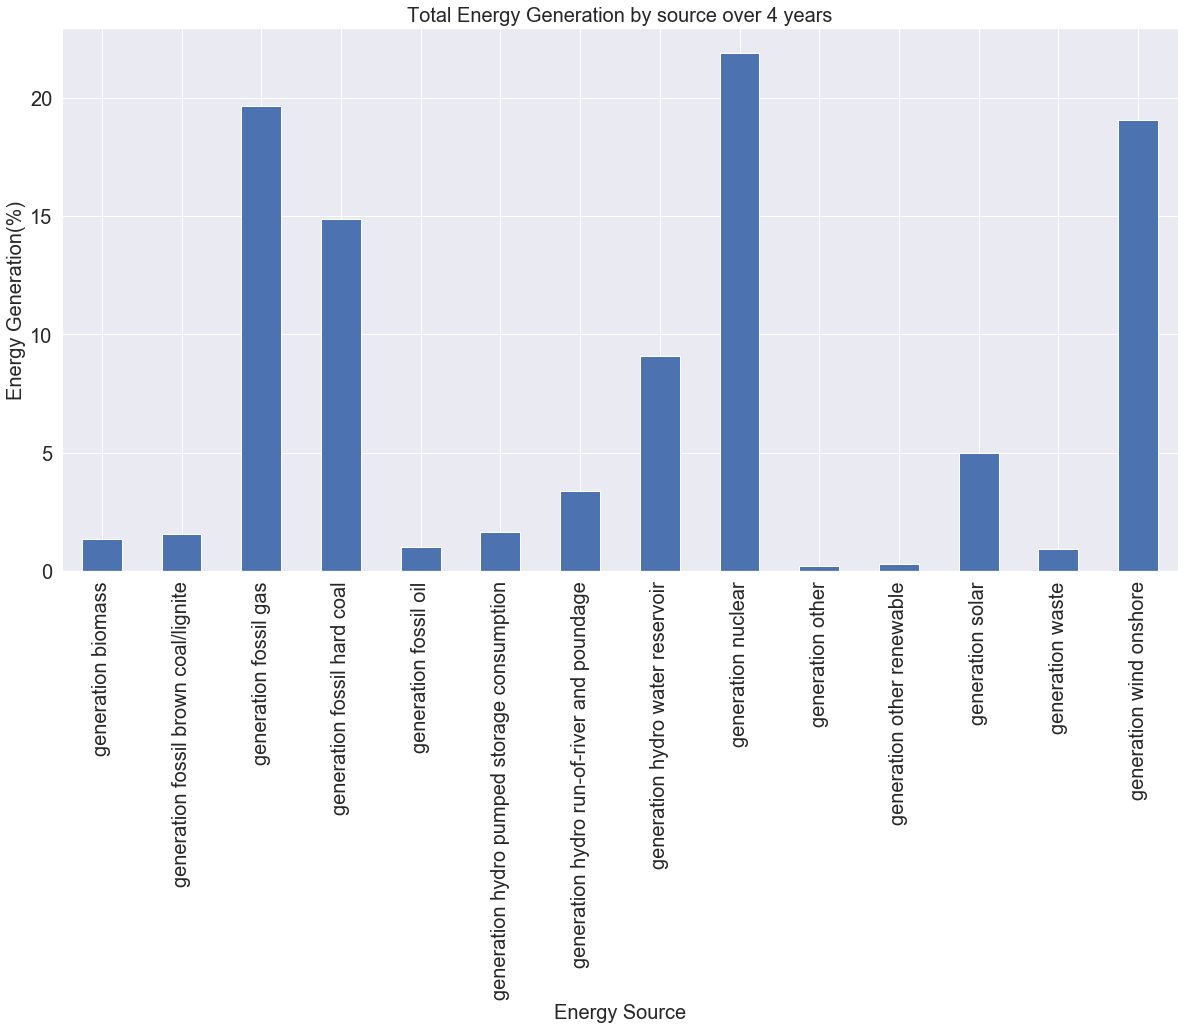

In [66]:
#Bar graphs for energy source distibution over 4 years
((annual_generation.sum().div(annual_generation.sum().sum()))*100).plot(kind='bar',figsize=[20,10])
plt.xlabel("Energy Source",size=20)
plt.ylabel("Energy Generation(%)", size=20)
plt.title("Total Energy Generation by source over 4 years",size=20);

- There 14 functioning energy sources that data is recorded on. This is a lot to get insights from from one plot.
- The top 5 sources shall be examined. They all individually supply more than 5%.
- They are fossil gas, hard coal, nucleary, hydro water and  wind onshore.

In [67]:
#creating df for top 5 energy soruces with energy magnitudes
top_5=annual_generation.mean().sort_values(ascending=False)[:5].index

#creating df for top 5 energy sources with energy distribution in %
top_5_monthly_pct=monthly_generation[top_5].div(monthly_generation.sum(axis=1), axis=0)*100

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


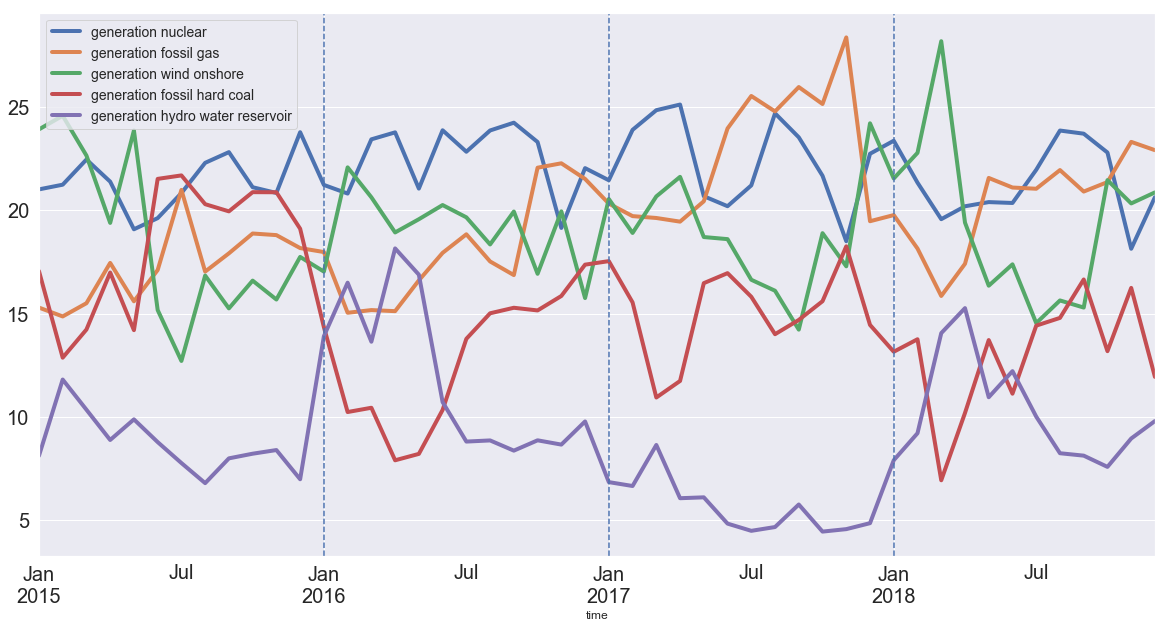

In [68]:
#plotting line plots
top_5_monthly_pct.plot(linewidth=4,figsize=[20,10])

#marking 1-Jan for every year
plt.axvline('01-01-2016',linestyle='--')
plt.axvline('01-01-2017',linestyle='--')
plt.axvline('01-01-2018',linestyle='--')
plt.legend(prop={"size":14},loc='upper left');

The patterns that we see:

 1. Nuclear is the highest source suplying on average 23% of total energy where the lowest is hydro with an average of 10%.

2. Wind and hydro energy look positively related. Since hydro is dependant on rain, and rain implies a higher possibility of wind then it makes sense for these to reach their peaks during winter. 


3. Wind and Hydro generation seem inversely proportional to coal anf fossil gas generation. Makes sense, if the weather is good...why not produce from green sources and avoid carbon emitting sources?


4. Nuclear Energy and natural gas seem inversely proportional. Perhaps has to do with natural gas prices? If natural gas is cheap, why not produce since it is considered the greenest fossil and avoid nuclear waste?


5. Coal had a peak of supplying more than 22% of total energy in the middle of 2015, but has since decreased and decreased below 10% in winter of of 2016 but has remained on an overall downtrend on the long term which is a good sign. 

Weather relationships will be examined in the section 4, but first.......

How does energy sourcer distribution change during the day?


In [69]:
hourly_generation=generation_new.groupby(generation_new.index.hour).sum()

#creating df for names of top 5 energy soruces with energy magnitudes
top_5_hourly=hourly_generation.mean().sort_values(ascending=False)[:5].index

#creating df for top 5 energy sources with energy distribution in %
top_5_hourly_pct=(hourly_generation[top_5_hourly]*100).div(hourly_generation.sum(axis=1),axis=0)

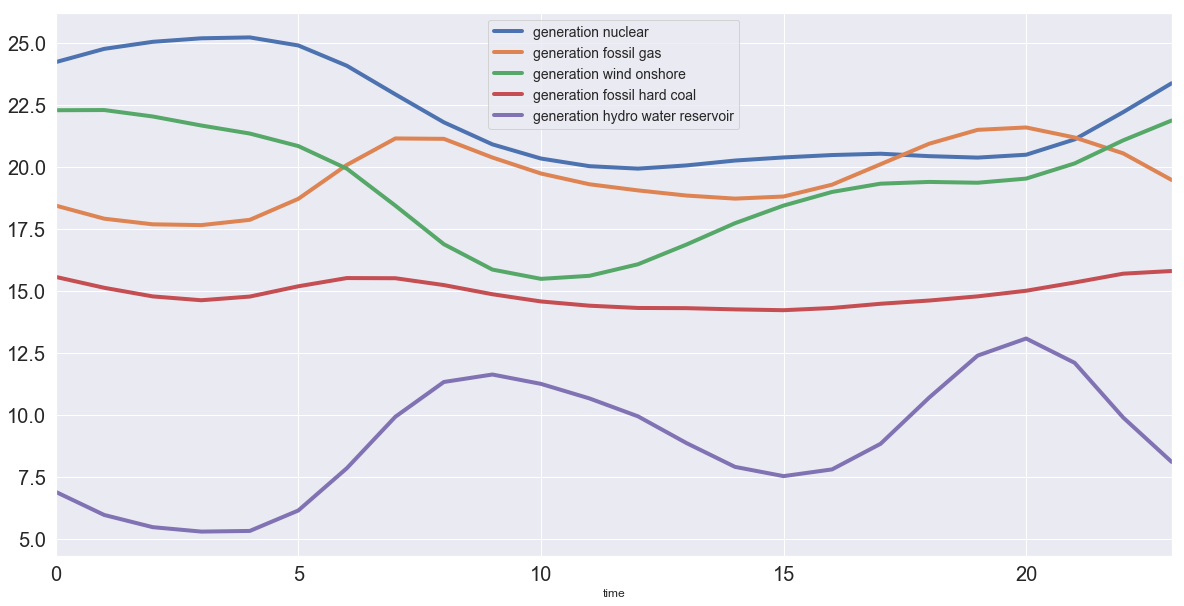

In [70]:
#plotting line plots
top_5_hourly_pct.plot(linewidth=4,figsize=[20,10])

plt.legend(prop={"size":14},loc='best');

- Nuclear is at highest production during night time from 8pm to 5am. Surprisingly this is the opposite of working hours.
- Coal is constant during the day.
- Hydro & Fossil Gas are inline with working hours, meaning there are no night shifts? 
- Wind power is highest at 12am and lowest at 10am. Wind speed is lowest at 5am and highest 3pm. Wind power does not seem to be correlated to wind speed on the intraday chart. Maybe wind direction makes a difference?

# 3. How are wind and solar energy sources related to weather features during the day? 

Let's start with wind energy to wind speed and wind direction for the hour of day.

In [76]:
wind_hourly_generation=generation_new['generation wind onshore'].groupby(generation_new.index.hour).mean()

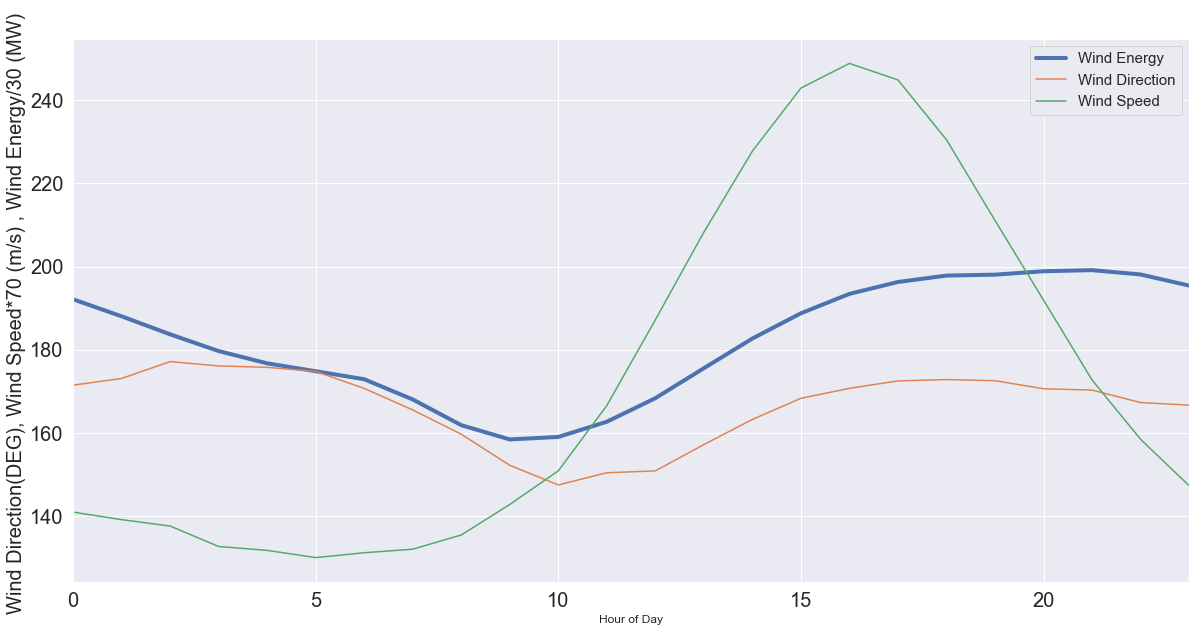

In [235]:
#plotting wind speed, wind energy and wind direction while rescaling to visualise pattern
(wind_hourly_generation/30).plot(linewidth=4,figsize=[20,10], label='Wind Energy')
plt.plot(avg_weather['wind_deg'].groupby(avg_weather.index.hour).mean(),label='Wind Direction')
plt.plot((avg_weather['wind_speed']*70).groupby(avg_weather.index.hour).mean(),label='Wind Speed')

plt.legend(prop={'size':15})
plt.ylabel("Wind Direction(DEG), Wind Speed*70 (m/s) , Wind Energy/30 (MW) ", size=20)
plt.xlabel("Hour of Day");

During the day, wind energy looks highly dependant on wind direction.

- The average Wind direction over the 4 years ranges between 175 and 150 degrees.
- It seems if wind is coming from a certain direction, then wind speed will have an effect on wind power. This is worth examining further...

Let's create a dataframe of wind degree, energy generation from wind.

We shall then find the average energy generated from wind for every wind direction

In [153]:
#merging 2x series into 1 dataframe
wind_deg_gen=(pd.merge(left=weather['wind_deg'], right=generation_new['generation wind onshore'], left_index=True, right_index=True));

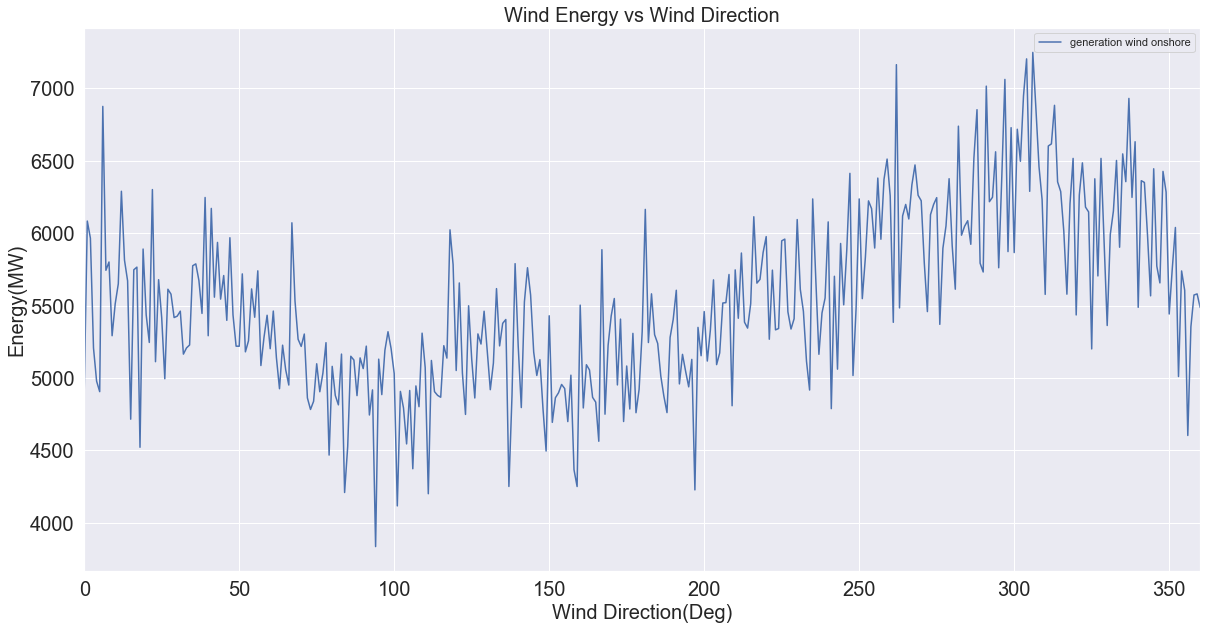

In [234]:
#sorting dataframe by wind degree, then grouping by wind degree, aggregating using the mean and plotting 
wind_deg_gen.sort_values(by="wind_deg").groupby("wind_deg").mean().plot.line(figsize=[20,10])

plt.xlabel("Wind Direction(Deg)",size=20)
plt.ylabel("Energy(MW)",size=20)
plt.title("Wind Energy vs Wind Direction",size=20);

We see a sinusoidal relationship between Energy generated from wind in spain.
 - 0 to 90 deg, Energy is decreases and hits low at 90
 - 90 to 300 deg, Energy is increasing and hits high
 - 300 to 90, Energy is decreasing

It is well know that Solar energy is maximised during summer and lowest during winter but how much more energy can it provide to the grid especially for a sunny country like spain? And can we confirm that clouds is inversely proportional to solar energy?

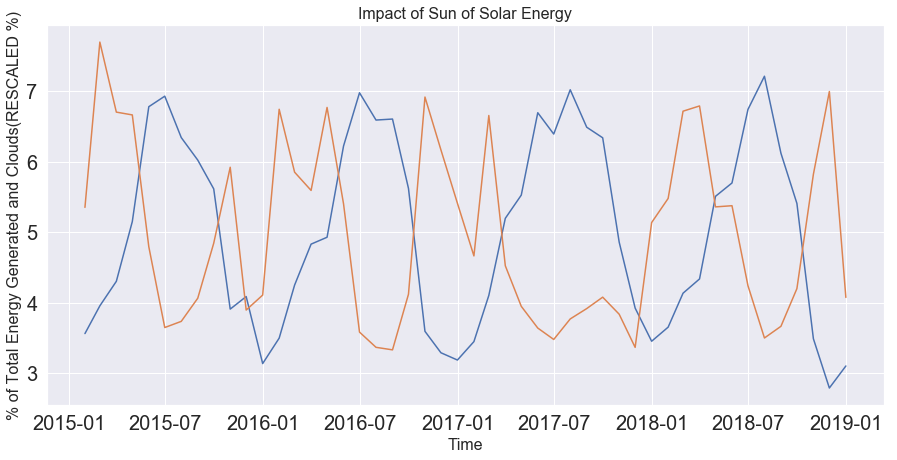

In [211]:
#plotting solar energy line plot
plt.figure(figsize=[15,7])
plt.plot(((monthly_generation['generation solar'])*100)/monthly_generation.sum(axis=1))
plt.plot(avg_weather.clouds_all.resample("M").mean()/5)
plt.xlabel("Time", size=16)
plt.ylabel("% of Total Energy Generated and Clouds(RESCALED %)", size=16)
plt.title("Impact of Sun of Solar Energy",size=16);

A 4% range in Solar Energy generation!! From 3% in winter to 7% in summer. That is a significant jump but tells you that we can never be totally reliant on Solar Energy. 

And yes.... more clouds --> Less Solar energy produced

As per our summary in Section 2, we shall examine energy source correlation to each other in the next section...

# 4. Which are energy sources correlated togather? 

Let's start with wind and hydro..

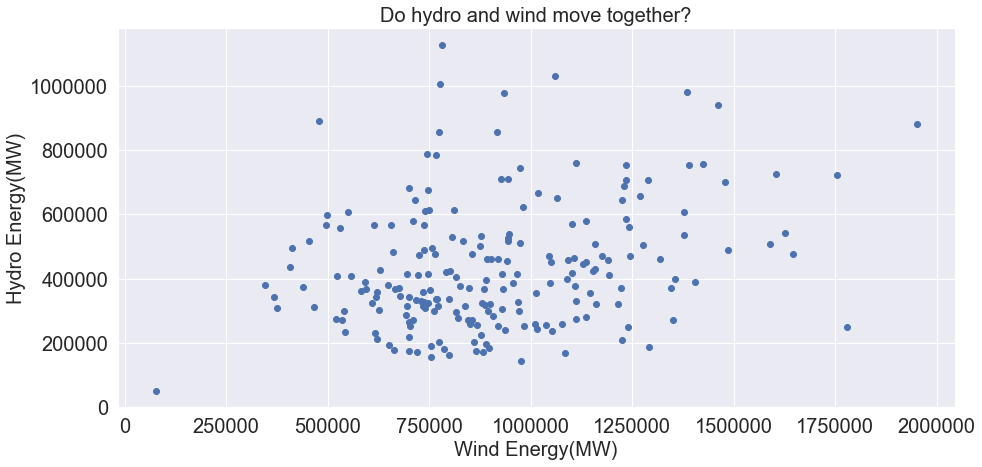

In [2201]:
#Scatter plot between Hydro energy and wind energy
plt.figure(figsize=[15,7])
plt.scatter(weekly_generation['generation wind onshore'].values, weekly_generation['generation hydro water reservoir'].values)
plt.xlabel("Wind Energy(MW)",size=20)
plt.ylabel("Hydro Energy(MW)",size=20)
plt.title("Do hydro and wind move together?",size=20);

A positive relationship is evident between hydro and wind energy.

What about Hydro and Coal?

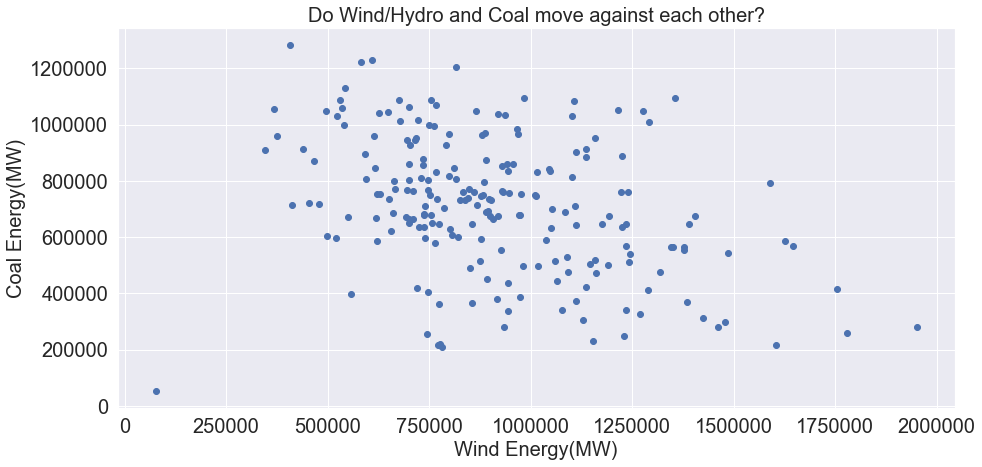

In [2126]:
#Scatter plot between Hydro energy and coal energy
plt.figure(figsize=[15,7])
plt.scatter(weekly_generation['generation wind onshore'].values, weekly_generation['generation fossil hard coal'].values)
plt.xlabel("Wind Energy(MW)",size=20)
plt.ylabel("Coal Energy(MW)",size=20)
plt.title("Do Wind/Hydro and Coal move against each other?",size=20);

Indeed there is a negative relationship between renewable sources and coal energy generated.

Nuclear and Gas?

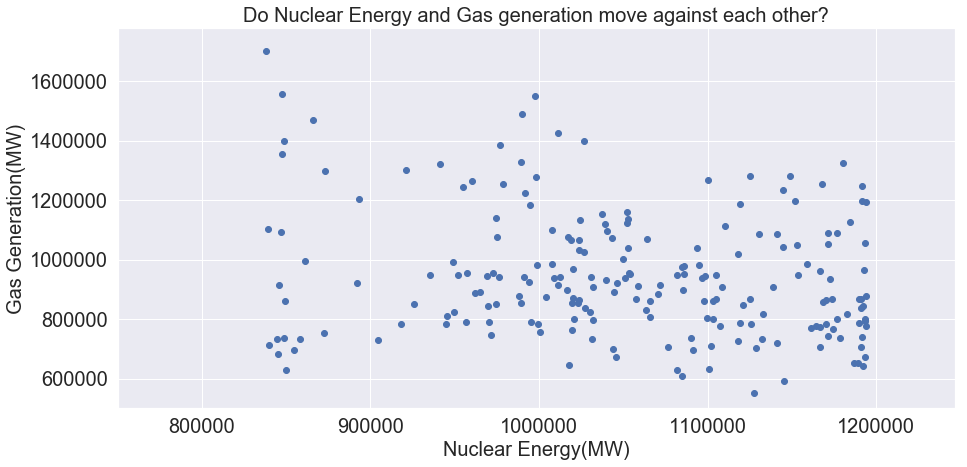

In [2127]:
#plotting nuclear vs gas energy
plt.figure(figsize=[15,7])
plt.scatter(weekly_generation['generation nuclear'].values, weekly_generation['generation fossil gas'].values)
plt.xlim(left=750000)
plt.ylim(bottom=500000)
plt.xlabel("Nuclear Energy(MW)",size=20)
plt.ylabel("Gas Generation(MW)",size=20)
plt.title("Do Nuclear Energy and Gas generation move against each other?",size=20);

There might be a negative relationship bewtween Nuclear and Natural gas but is a very weak one.

Now..... Some analysis of renewable energy source reliability...

# 5. Renewable vs Non-Renewable Energy 

In [212]:
pd.Series(generation_new.columns)

0                              generation biomass
1            generation fossil brown coal/lignite
2                           generation fossil gas
3                     generation fossil hard coal
4                           generation fossil oil
5     generation hydro pumped storage consumption
6      generation hydro run-of-river and poundage
7                generation hydro water reservoir
8                              generation nuclear
9                                generation other
10                     generation other renewable
11                               generation solar
12                               generation waste
13                        generation wind onshore
dtype: object

In [223]:
#Dataframes for renewables and fossil fuels
renewable=generation_new.iloc[:,[0,5,6,7,10,11,12,13]].resample("M").sum()
fossil=generation_new.iloc[:,[1,2,3,4,9]].resample("M").sum()

#Series for sums of renewable and fossil fuels
renewable_sum=renewable.sum(axis=1)
fossil_sum=fossil.sum(axis=1)

#Percentage distributions of renewbles and fossil fuels means
renewable_pct=(renewable_sum*100/(renewable_sum+fossil_sum))
renewable_pct_year=renewable_pct.groupby(renewable_pct.index.year).mean()

fossil_pct=(fossil_sum*100/(renewable_sum+fossil_sum))
fossil_pct_year=fossil_pct.groupby(fossil_pct.index.year).mean()

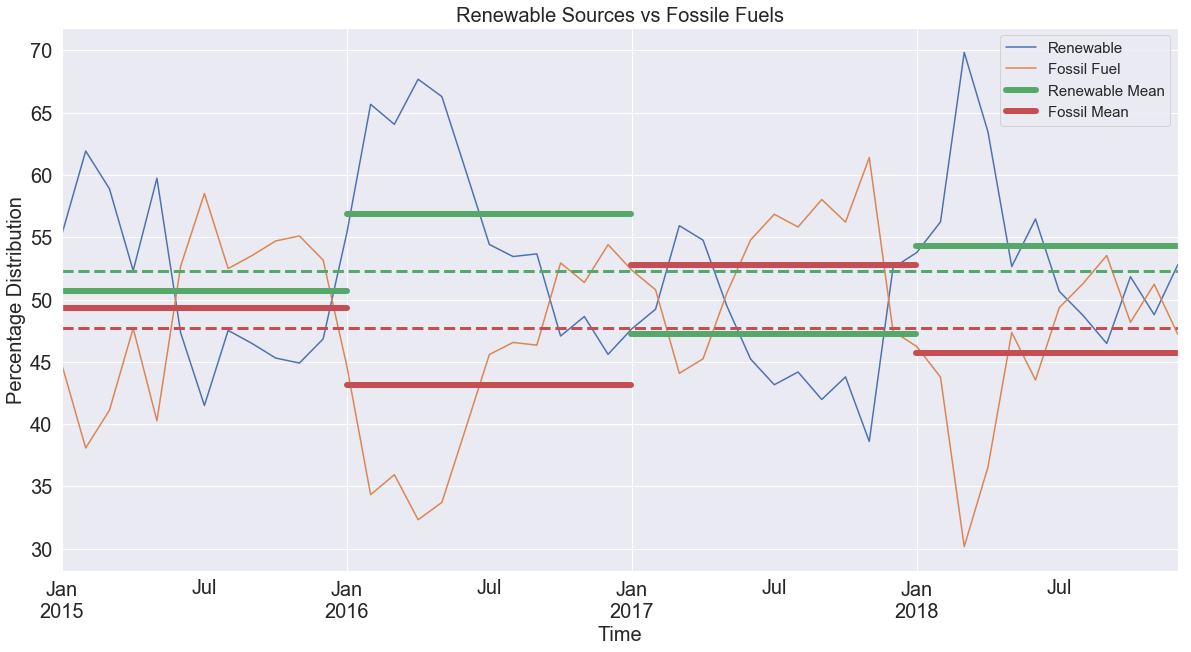

In [228]:
#Plotting Renewable vs Non Renewable generation over the years
pd.DataFrame({"Renewable":renewable_pct,
             "Fossil Fuel":fossil_pct,
             }).plot.line(figsize=[20,10])

plt.xlabel("Time",size=20)
plt.ylabel("Percentage Distribution",size=20)
plt.title("Renewable Sources vs Fossile Fuels",size=20)

#Average for each year for Renewable Energy
plt.axhline(renewable_pct_year.loc[2015], c='g',xmax=0.255, linewidth=6, label='Renewable Mean')
plt.axhline(renewable_pct_year.loc[2016], c='g',xmin=0.255, xmax=0.51, linewidth=6)
plt.axhline(renewable_pct_year.loc[2017], c='g',xmin=0.51, xmax=0.765, linewidth=6)
plt.axhline(renewable_pct_year.loc[2018], c='g',xmin=0.765, xmax=1, linewidth=6)

#Average for each year for Fossil Fuels
plt.axhline(fossil_pct_year.loc[2015], c='r',xmax=0.255, linewidth=6,label='Fossil Mean')
plt.axhline(fossil_pct_year.loc[2016], c='r',xmin=0.255, xmax=0.51, linewidth=6)
plt.axhline(fossil_pct_year.loc[2017], c='r',xmin=0.51, xmax=0.765, linewidth=6)
plt.axhline(fossil_pct_year.loc[2018], c='r',xmin=0.765, xmax=1, linewidth=6)

#4 Year Average for Renewable and Fossile Fuels
plt.axhline(renewable_pct_year.mean(), c='g', linewidth=3,linestyle='--')
plt.axhline(fossil_pct_year.mean(), c='r' ,linewidth=3,linestyle='--')
plt.legend(prop={'size':15});


Green lines represent renewable energy sources averages while red represents fossil fuels.
The dotted line is the 4 year average while the solid lines represent yearly averages.


It seems if the renewable energy sources is highly dependant on how weather features are in the winter.
Fossil fuel generation is controlled by how much renewable energy is generated. 

The good news is that on average renewbale energy sources generate 5% more than fossil fuels.

The bad news is that there is a high variability/unpredictability and dependance on weather for renewable energy sources. As seen in 2017, there was a lower generation from renewables contrary to the other years. The sources that would have such effects are wind energy and hydro energy depends on rain....



Let's recall how weather features changed during this period. 



In [229]:
total= fossil.sum(axis=1) + renewable.sum(axis=1)

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


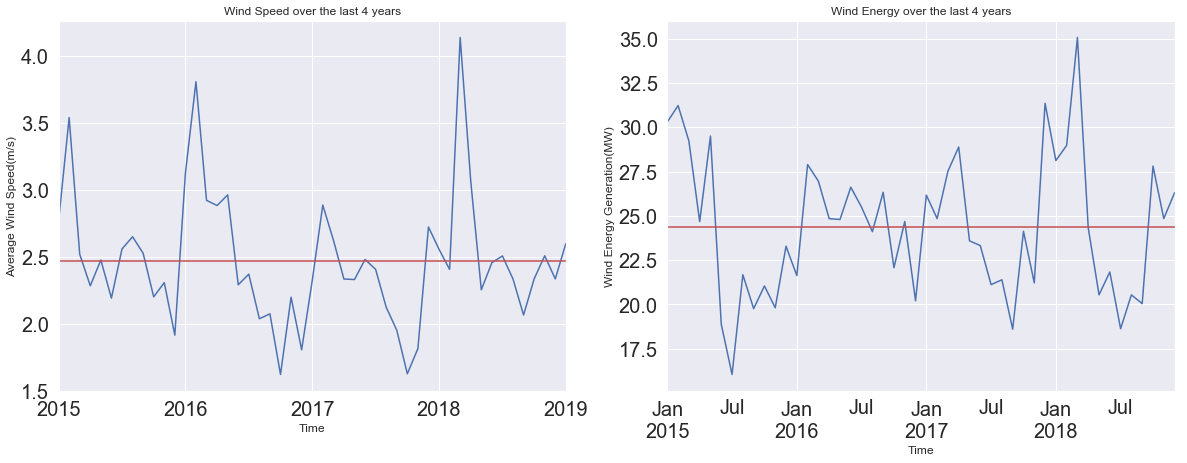

In [230]:
plt.figure(figsize=[20,15])
#PLotting Wind Speed
plt.subplot(2,2,1)
weather['wind_speed'].resample('M').mean().plot()
plt.xlabel("Time")
plt.ylabel("Average Wind Speed(m/s)")
plt.title("Wind Speed over the last 4 years")
plt.axhline(weather['wind_speed'].mean(),c='r')

#Plotting Wind Power
plt.subplot(2,2,2)
(renewable['generation wind onshore']*100/total).plot()
plt.xlabel("Time")
plt.ylabel("Wind Energy Generation(MW)")
plt.title("Wind Energy over the last 4 years")
plt.axhline((renewable['generation wind onshore']*100/total).mean(),c='r');

Winter of 2017 definitely a peak wind speed of around 2.75m/s which is way below the peak over the other 3 winters. The high winds also did not last very long.
For other winters the peak was between 3.5-4.5m/s. This resulted in a lower than normal energy generation from wind power but is not that significant. 

What about hydro?

C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\yfawz\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


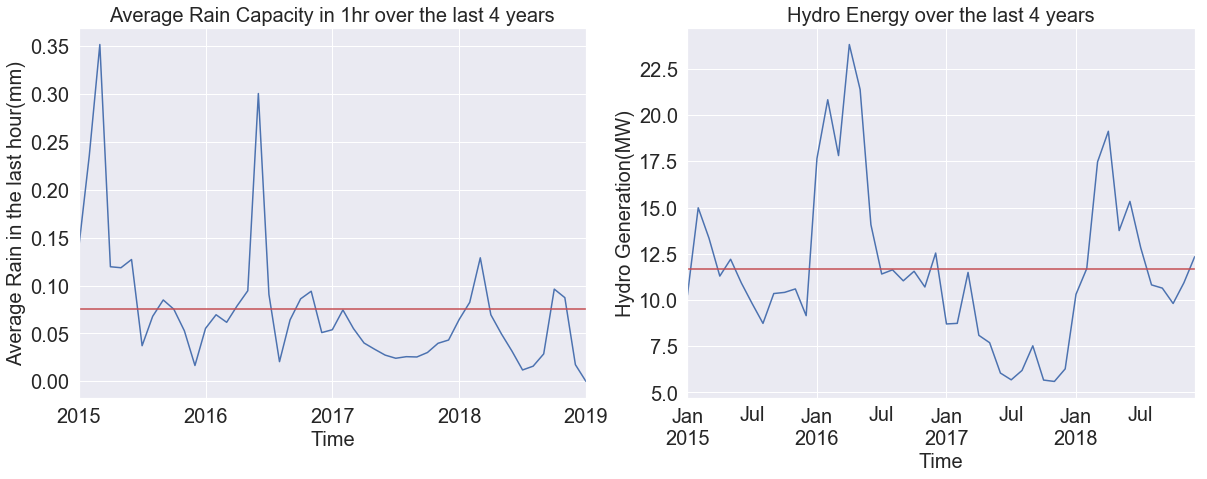

In [233]:
plt.figure(figsize=[20,15])
#PLotting rain
plt.subplot(2,2,1)
weather['rain_1h'].resample('M').mean().plot()
plt.xlabel("Time",size=20)
plt.ylabel("Average Rain in the last hour(mm)",size=20)
plt.title("Average Rain Capacity in 1hr over the last 4 years",size=20)
plt.axhline(weather['rain_1h'].mean(),c='r')

#Plotting Hydro Power
plt.subplot(2,2,2)
(renewable['generation hydro water reservoir']*100/total).plot()
plt.xlabel("Time",size=20)
plt.ylabel("Hydro Generation(MW)",size=20)
plt.title("Hydro Energy over the last 4 years",size=20)
plt.axhline((renewable['generation hydro water reservoir']*100/total).mean(),c='r');

The average Hydro energy generated is around 12%. In winters, this can go up to 15-20%. 2017 was a disaster for hydro as there was 4 year low recorded of 5 % generation. The second lowest was that of summer 2016 at 8%.

Winter of 2017 recorded a generation of 10%, which is well below the 4 year average and we can see why....It was a very dry winter. 
This is the reason why fossil fuels are needed. If winter is not windy and rainy, renewables will not be able to sustain the economy and fossil fuels will be essential for survival.